Import necessary modules.

In [1]:
# Import correct modules using accurate aliases
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from datetime import datetime

%matplotlib inline

Import all datasets.

In [2]:
# Import climate data
climate_wk = pd.read_csv("../datasets/climate_wk.csv")

# Convert the time column to datetime format
climate_wk['DateTime'] = pd.to_datetime(climate_wk['DateTime'])

In [3]:
climate_wk.head(3)

DateTime  Mean Temperature (°C)  Mean Wind Speed (km/h)  \
0 1980-01-06              27.676001                7.534925   
1 1980-01-13              27.676001                7.534925   
2 1980-01-20              27.676001                7.534925   

   Daily Rainfall Total (mm)  Maximum Temperature (°C)  Max Wind Speed (km/h)  \
0                   2.850000                 31.522349                   32.8   
1                   1.128571                 31.522349                   32.8   
2                  39.357143                 31.522349                   32.8   

   Minimum Temperature (°C)  
0                 24.924584  
1                 24.924584  
2                 24.924584

In [4]:
climate_wk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   DateTime                   2253 non-null   datetime64[ns]
 1   Mean Temperature (°C)      2253 non-null   float64       
 2   Mean Wind Speed (km/h)     2253 non-null   float64       
 3   Daily Rainfall Total (mm)  2253 non-null   float64       
 4   Maximum Temperature (°C)   2253 non-null   float64       
 5   Max Wind Speed (km/h)      2253 non-null   float64       
 6   Minimum Temperature (°C)   2253 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 123.3 KB


In [5]:
# import climate_daily
climate_daily = pd.read_csv("../datasets/climate_daily.csv")

# Convert the time column to datetime format
climate_daily['DateTime'] = pd.to_datetime(climate_daily['DateTime'])

In [6]:
climate_daily.head(3)

Max Wind Speed (km/h)  Daily Rainfall Total (mm)  Minimum Temperature (°C)  \
0                   32.8                        0.0                 24.924584   
1                   32.8                        0.0                 24.924584   
2                   32.8                        0.0                 24.924584   

   Day  Year Station  Mean Wind Speed (km/h)  Month  Mean Temperature (°C)  \
0    1  1980  Changi                7.534925      1              27.676001   
1    2  1980  Changi                7.534925      1              27.676001   
2    3  1980  Changi                7.534925      1              27.676001   

   Maximum Temperature (°C)   DateTime  
0                 31.522349 1980-01-01  
1                 31.522349 1980-01-02  
2                 31.522349 1980-01-03

In [7]:
climate_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15765 entries, 0 to 15764
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Max Wind Speed (km/h)      15765 non-null  float64       
 1   Daily Rainfall Total (mm)  15765 non-null  float64       
 2   Minimum Temperature (°C)   15765 non-null  float64       
 3   Day                        15765 non-null  int64         
 4   Year                       15765 non-null  int64         
 5   Station                    15765 non-null  object        
 6   Mean Wind Speed (km/h)     15765 non-null  float64       
 7   Month                      15765 non-null  int64         
 8   Mean Temperature (°C)      15765 non-null  float64       
 9   Maximum Temperature (°C)   15765 non-null  float64       
 10  DateTime                   15765 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(3), object(1)
memory usage:

---
### Regression Line Plots to Explore Relationships between Features

/var/folders/1k/lmhy97td4h17yfgn7vlzp0ph0000gp/T/ipykernel_6022/520208917.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(climate_wk.corr(), dtype=None)
/var/folders/1k/lmhy97td4h17yfgn7vlzp0ph0000gp/T/ipykernel_6022/520208917.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(climate_wk.corr(), vmin=0.0, vmax=1.0, mask=mask, cmap='cool', annot=True, linewidths = 0.3)


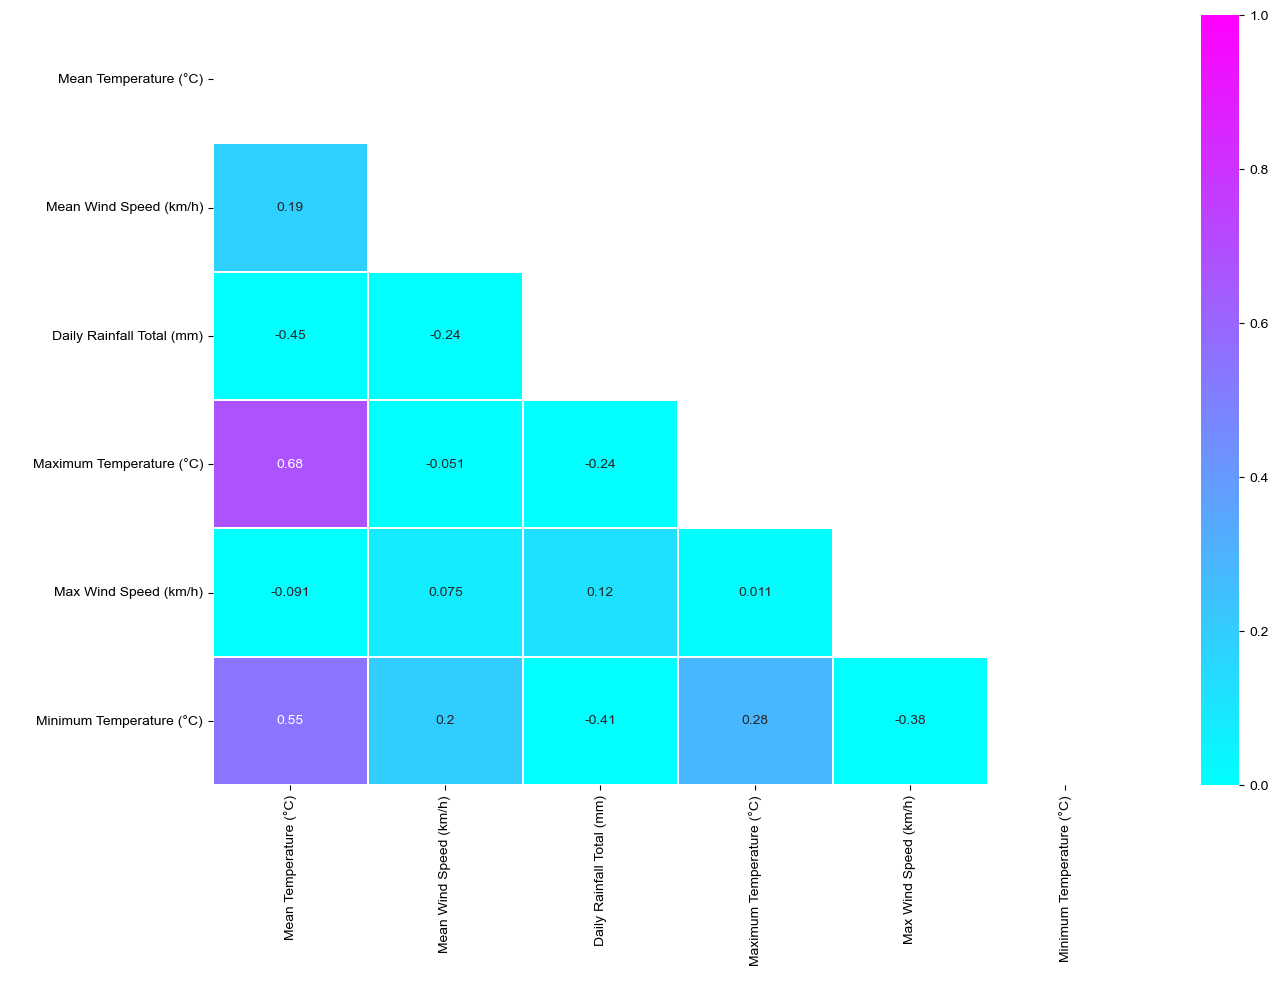

In [8]:
# First use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features
# Establish figure size
fig = plt.subplots(figsize=(15, 10))

# Create a mask for the top half (repeated values) of the heat map
mask = np.zeros_like(climate_wk.corr(), dtype=None)
mask[np.triu_indices_from(mask)]=True

# Plot the correlation heat map
sns.heatmap(climate_wk.corr(), vmin=0.0, vmax=1.0, mask=mask, cmap='cool', annot=True, linewidths = 0.3)
sns.set(font_scale=0.5)

# Display the heat map
plt.show();

In [59]:
# create a function for the use of regression plots to explore relationships between features
def reg_plot(x,y,df,hue=None):
    sns.lmplot(df, x=x,y=y,hue=hue, height=5, aspect=1.5)
    plt.title(y.replace("_", " ").title()+" vs "+x.replace("_", " ").title())
    plt.xlabel(x.replace("_", " ").title())
    plt.ylabel(y.replace("_", " ").title())

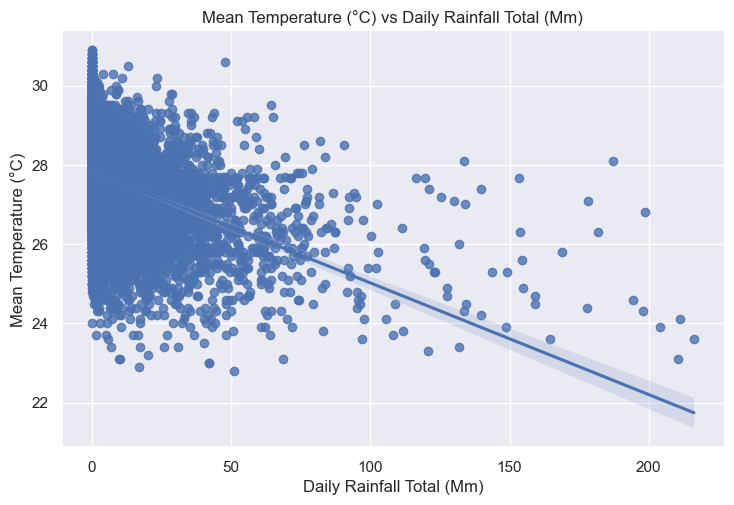

In [63]:
# regression line to examine relationship between rainfall and mean/max/min temperature
reg_plot('Daily Rainfall Total (mm)','Mean Temperature (°C)', climate_daily, hue=None)

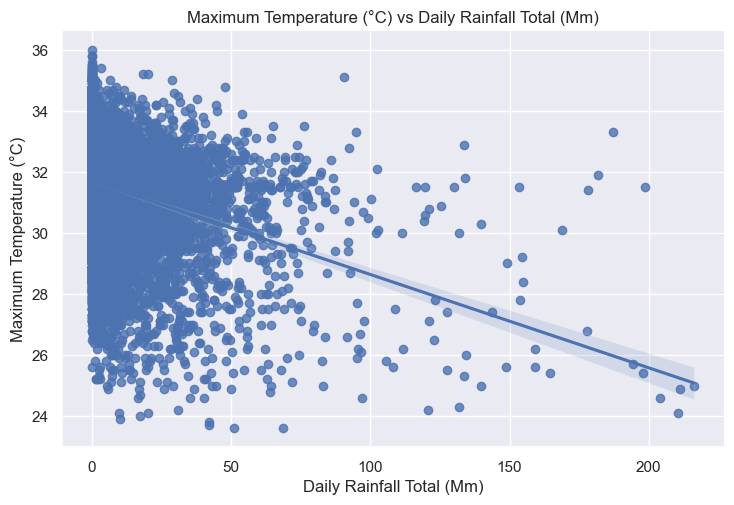

In [64]:
# regression line to examine relationship between rainfall and mean/max/min temperature
reg_plot('Daily Rainfall Total (mm)','Maximum Temperature (°C)', climate_daily, hue=None)

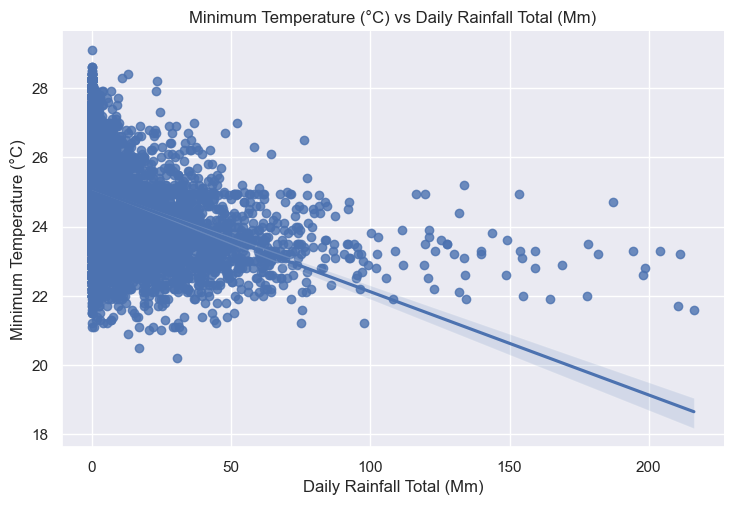

In [65]:
# regression line to examine relationship between rainfall and mean/max/min temperature
reg_plot('Daily Rainfall Total (mm)','Minimum Temperature (°C)', climate_daily, hue=None)

---
### Time Series Line Plots

#### Minimum, Maximum, Mean Temperature Data collected at Changi Station from 1980 to 2023

In [9]:
climate_wk.columns

Index(['DateTime', 'Mean Temperature (°C)', 'Mean Wind Speed (km/h)',
       'Daily Rainfall Total (mm)', 'Maximum Temperature (°C)',
       'Max Wind Speed (km/h)', 'Minimum Temperature (°C)'],
      dtype='object')

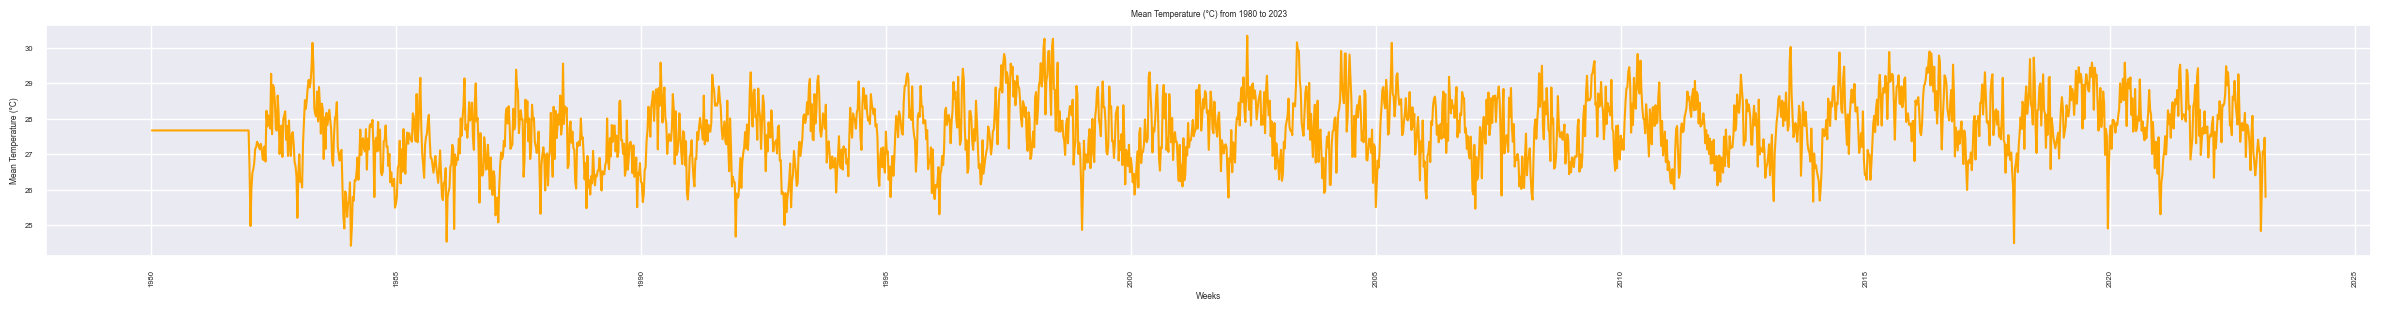

In [10]:
# Mean Temperature over the weeks, 1980-2023
plt.figure(figsize=(30, 3))

# Define X and y
x = climate_wk['DateTime']
y = climate_wk['Mean Temperature (°C)']

plt.plot(x,y,color='orange')

plt.title(label='Mean Temperature (°C) from 1980 to 2023')
plt.xlabel(xlabel='Weeks')
plt.ylabel(ylabel='Mean Temperature (°C)')
plt.xticks(rotation=90);

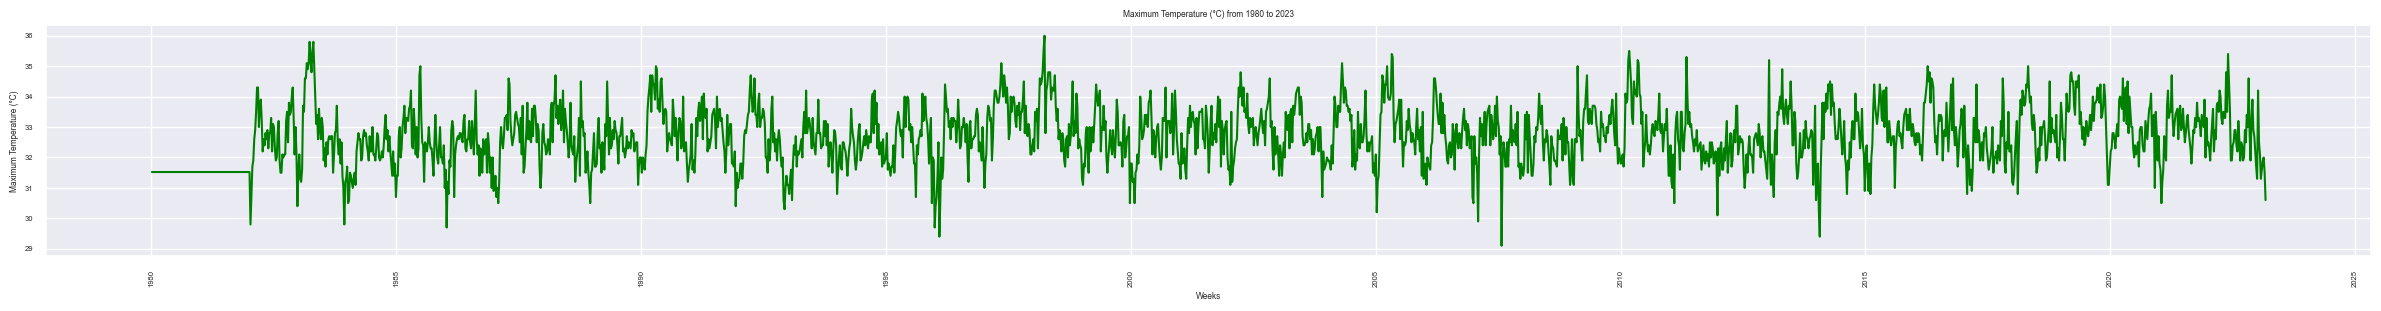

In [11]:
# Maximum Temperature over the weeks, 1980-2023
plt.figure(figsize=(30, 3))

# Define X and y
x = climate_wk['DateTime']
y = climate_wk['Maximum Temperature (°C)']

plt.plot(x,y, color='green')

plt.title(label='Maximum Temperature (°C) from 1980 to 2023')
plt.xlabel(xlabel='Weeks')
plt.ylabel(ylabel='Maximum Temperature (°C)')
plt.xticks(rotation=90);

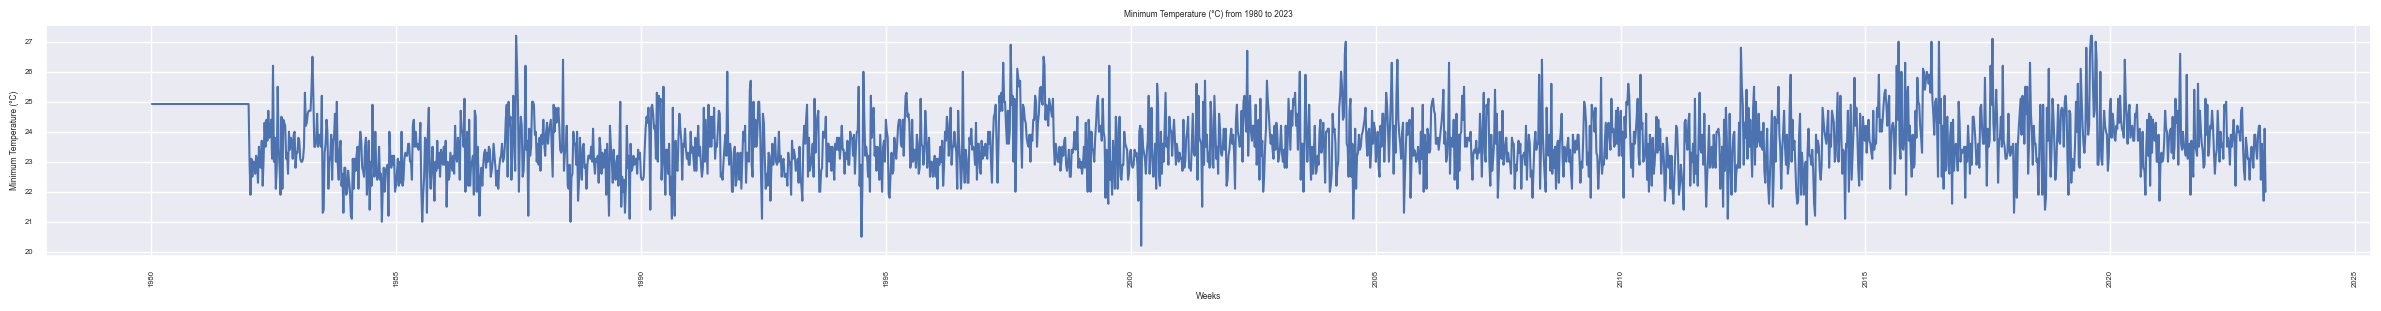

In [12]:
# Minimum Temperature over the weeks, 1980-2023
plt.figure(figsize=(30, 3))

# Define X and y
x = climate_wk['DateTime']
y = climate_wk['Minimum Temperature (°C)']

plt.plot(x,y)

plt.title(label='Minimum Temperature (°C) from 1980 to 2023')
plt.xlabel(xlabel='Weeks')
plt.ylabel(ylabel='Minimum Temperature (°C)')
plt.xticks(rotation=90);

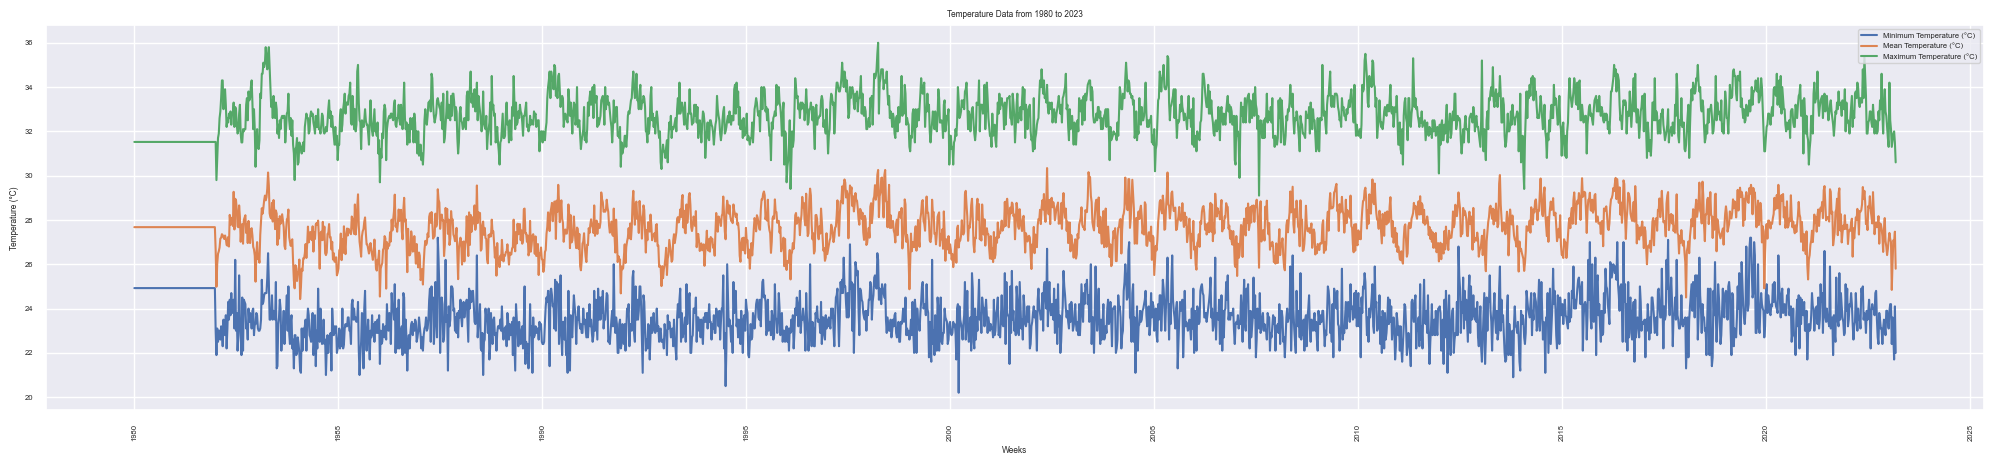

In [13]:
# Temperature Data over the weeks, 1980-2023
plt.figure(figsize=(25, 5))

# Define X and y
x = climate_wk['DateTime']
y = climate_wk[['Minimum Temperature (°C)', 'Mean Temperature (°C)', 'Maximum Temperature (°C)']]

plt.plot(x,y)

plt.title(label='Temperature Data from 1980 to 2023')
plt.xlabel(xlabel='Weeks')
plt.ylabel(ylabel='Temperature (°C)')
plt.xticks(rotation=90)

# Add legend
plt.legend(['Minimum Temperature (°C)', 'Mean Temperature (°C)', 'Maximum Temperature (°C)'], loc='upper right');

#### Mean and Maximum Wind Speed Data collected at Changi Station from 1980 to 2023

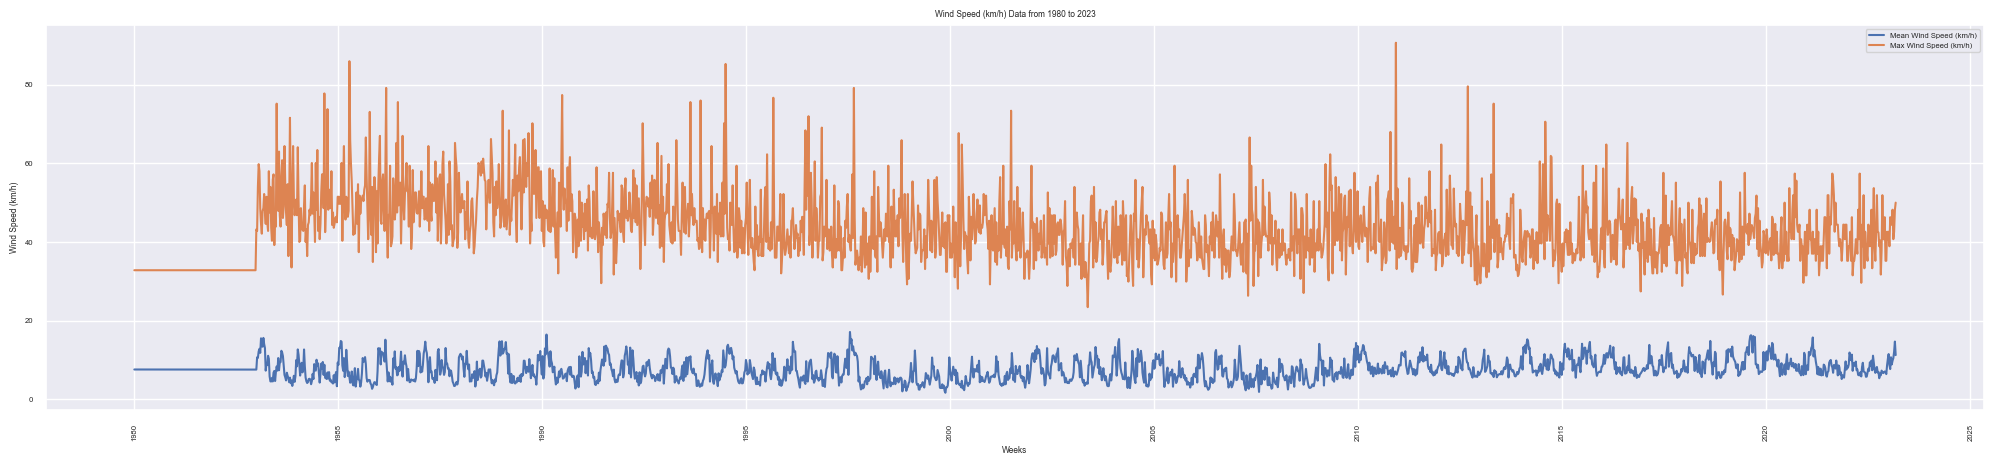

In [14]:
# Wind Speed Data over the weeks, 1980-2023
plt.figure(figsize=(25, 5))

# Define X and y
x = climate_wk['DateTime']
y = climate_wk[['Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)', ]]

plt.plot(x,y)

plt.title(label='Wind Speed (km/h) Data from 1980 to 2023')
plt.xlabel(xlabel='Weeks')
plt.ylabel(ylabel='Wind Speed (km/h)')
plt.xticks(rotation=90)

# Add legend
plt.legend(['Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)'], loc='upper right');

#### Daily Rainfall Total (mm) collected at Changi Station from 1980 to 2023

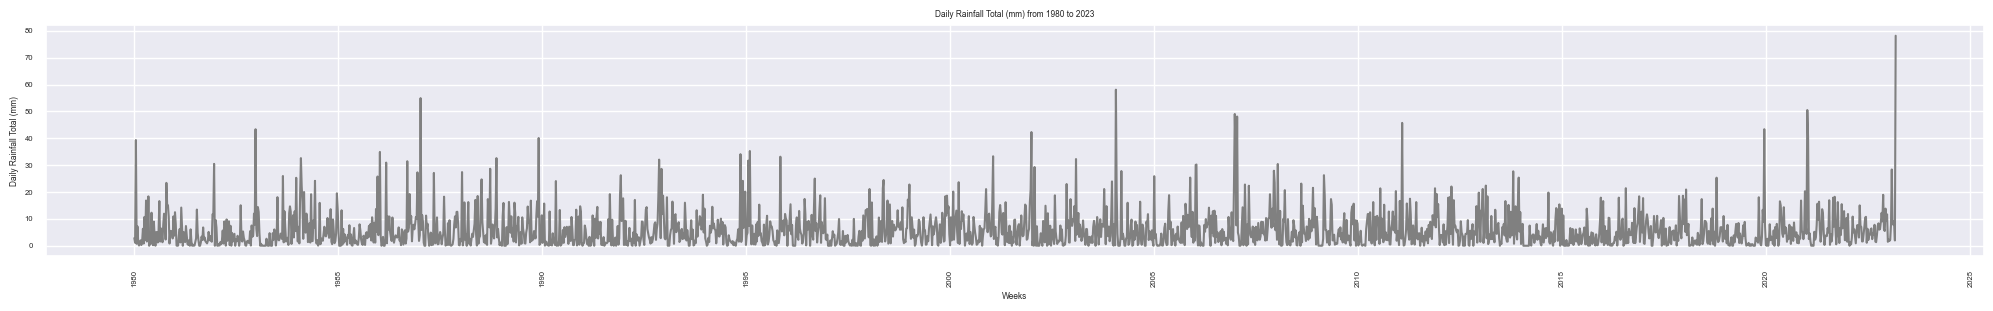

In [15]:
# Daily Rainfall Total(mm) over the weeks, 1980-2023
plt.figure(figsize=(25, 3))

# Define X and y
x = climate_wk['DateTime']
y = climate_wk['Daily Rainfall Total (mm)']

plt.plot(x,y, color='grey')

plt.title(label='Daily Rainfall Total (mm) from 1980 to 2023')
plt.xlabel(xlabel='Weeks')
plt.ylabel(ylabel='Daily Rainfall Total (mm)')
plt.xticks(rotation=90);

---
### Boxplot

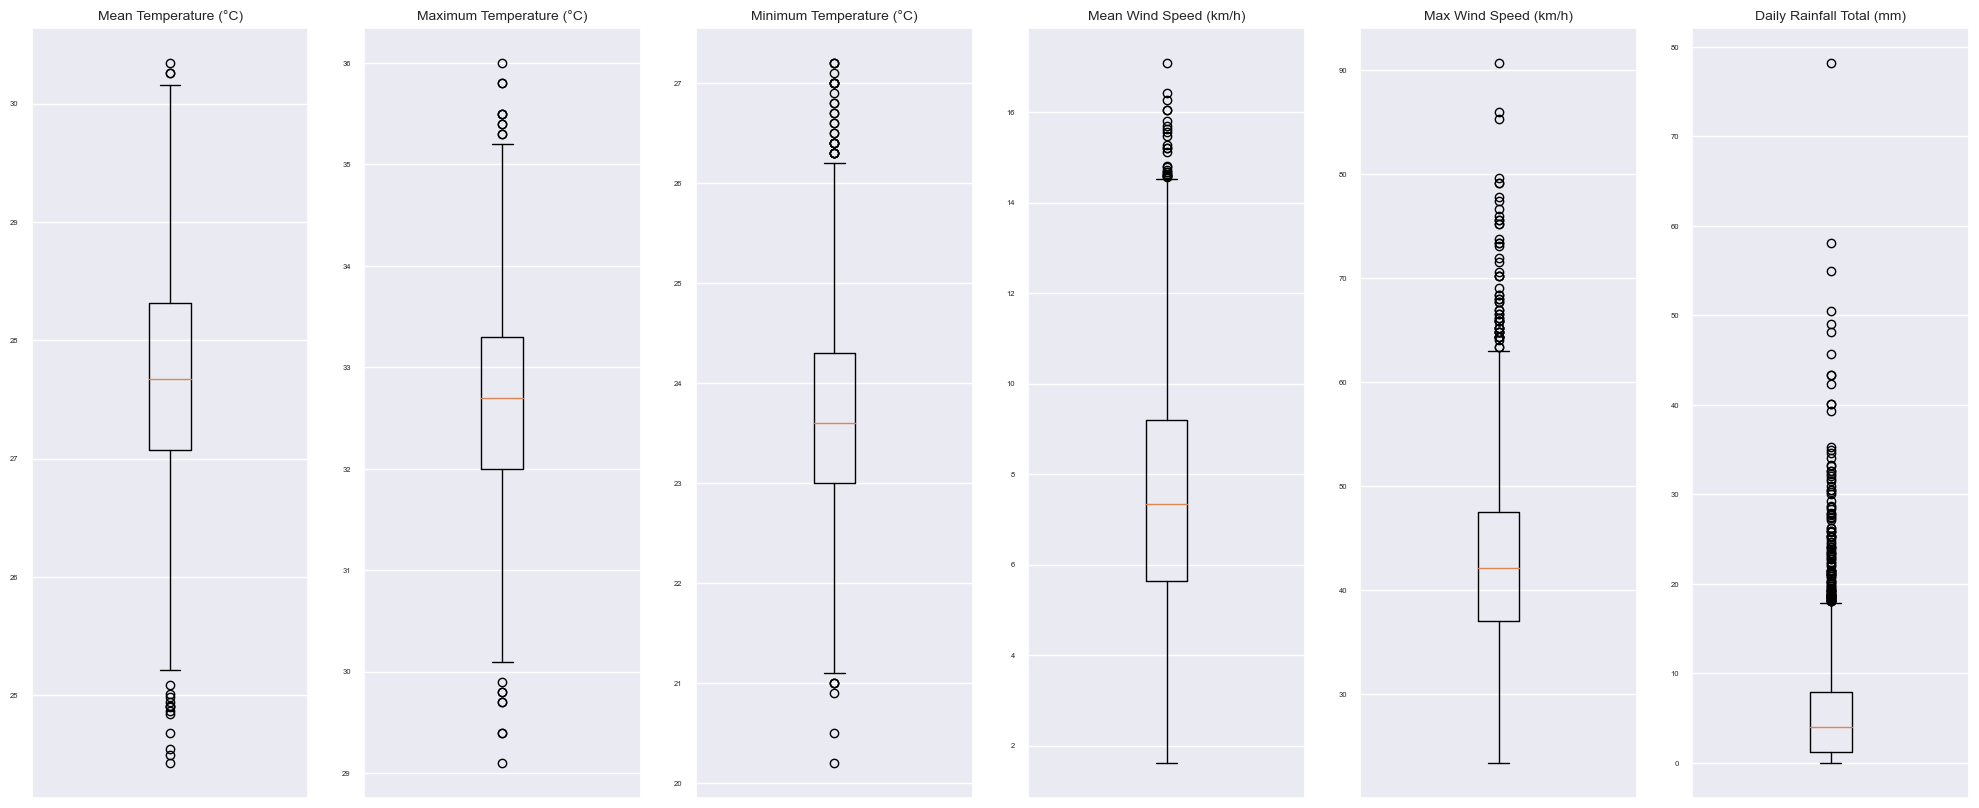

In [17]:
# establish figure size
plt.figure(figsize=[25, 10])

# subplot #1
# plt.subplot(1, 6, 1) means we have 1 row, 9 columns, and are referencing plot 1.
ax1 = plt.subplot(1,6,1) 
ax1.set_title('Mean Temperature (°C)', fontsize=10) 
ax1.boxplot(climate_wk['Mean Temperature (°C)'])
ax1.set_xticks([])

# subplot #2           
# plt.subplot(1, 6, 2) means we have 1 row, 9 columns, and are referencing plot 2.
ax2 = plt.subplot(1,6,2) 
ax2.set_title('Maximum Temperature (°C)', fontsize=10)
ax2.boxplot(climate_wk['Maximum Temperature (°C)']) 
ax2.set_xticks([])

# subplot #3
# plt.subplot(1, 6, 3) means we have 1 row, 9 columns, and are referencing plot 3.
ax3 = plt.subplot(1,6,3) 
ax3.set_title('Minimum Temperature (°C)', fontsize=10) 
ax3.boxplot(climate_wk['Minimum Temperature (°C)']) 
ax3.set_xticks([])

# subplot #4
# plt.subplot(1, 6, 4) means we have 1 row, 9 columns, and are referencing plot 4.
ax4 = plt.subplot(1,6,4) 
ax4.set_title('Mean Wind Speed (km/h)', fontsize=10) 
ax4.boxplot(climate_wk['Mean Wind Speed (km/h)'])
ax4.set_xticks([])

# subplot #5
# plt.subplot(1, 6, 5) means we have 1 row, 9 columns, and are referencing plot 5.
ax5 = plt.subplot(1,6,5) 
ax5.set_title('Max Wind Speed (km/h)', fontsize=10)
ax5.boxplot(climate_wk['Max Wind Speed (km/h)'])
ax5.set_xticks([])

# subplot #6
# plt.subplot(1, 6, 6) means we have 1 rows, 9 columns, and are referencing plot 6.
ax6 = plt.subplot(1,6,6)
ax6.set_title('Daily Rainfall Total (mm)', fontsize=10)
ax6.boxplot(climate_wk['Daily Rainfall Total (mm)'])
ax6.set_xticks([]);

---
### Time Series Boxplot 
> * Weekly Trend
> * Monthly Trend
> * Yearly Trend

In [18]:
climate_daily.head(3)

Max Wind Speed (km/h)  Daily Rainfall Total (mm)  Minimum Temperature (°C)  \
0                   32.8                        0.0                 24.924584   
1                   32.8                        0.0                 24.924584   
2                   32.8                        0.0                 24.924584   

   Day  Year Station  Mean Wind Speed (km/h)  Month  Mean Temperature (°C)  \
0    1  1980  Changi                7.534925      1              27.676001   
1    2  1980  Changi                7.534925      1              27.676001   
2    3  1980  Changi                7.534925      1              27.676001   

   Maximum Temperature (°C)   DateTime  
0                 31.522349 1980-01-01  
1                 31.522349 1980-01-02  
2                 31.522349 1980-01-03

In [19]:
climate_daily['Day'] = climate_daily.DateTime.apply(lambda x: x.strftime("%a"))

In [20]:
climate_daily['Month'] = climate_daily.DateTime.apply(lambda x: x.strftime("%b"))

In [21]:
climate_daily['Year'] = climate_daily.DateTime.apply(lambda x : x.strftime('%Y'))

In [22]:
climate_daily['DateTime'] = pd.to_datetime(climate_daily.DateTime)
climate_daily = climate_daily.set_index('DateTime')

In [23]:
climate_daily.head(3)

Max Wind Speed (km/h)  Daily Rainfall Total (mm)  \
DateTime                                                       
1980-01-01                   32.8                        0.0   
1980-01-02                   32.8                        0.0   
1980-01-03                   32.8                        0.0   

            Minimum Temperature (°C)  Day  Year Station  \
DateTime                                                  
1980-01-01                 24.924584  Tue  1980  Changi   
1980-01-02                 24.924584  Wed  1980  Changi   
1980-01-03                 24.924584  Thu  1980  Changi   

            Mean Wind Speed (km/h) Month  Mean Temperature (°C)  \
DateTime                                                          
1980-01-01                7.534925   Jan              27.676001   
1980-01-02                7.534925   Jan              27.676001   
1980-01-03                7.534925   Jan              27.676001   

            Maximum Temperature (°C)  
DateTime                              
1980-01-01                 31.522349  
1980-01-02                 31.522349  
1980-01-03                 31.522349

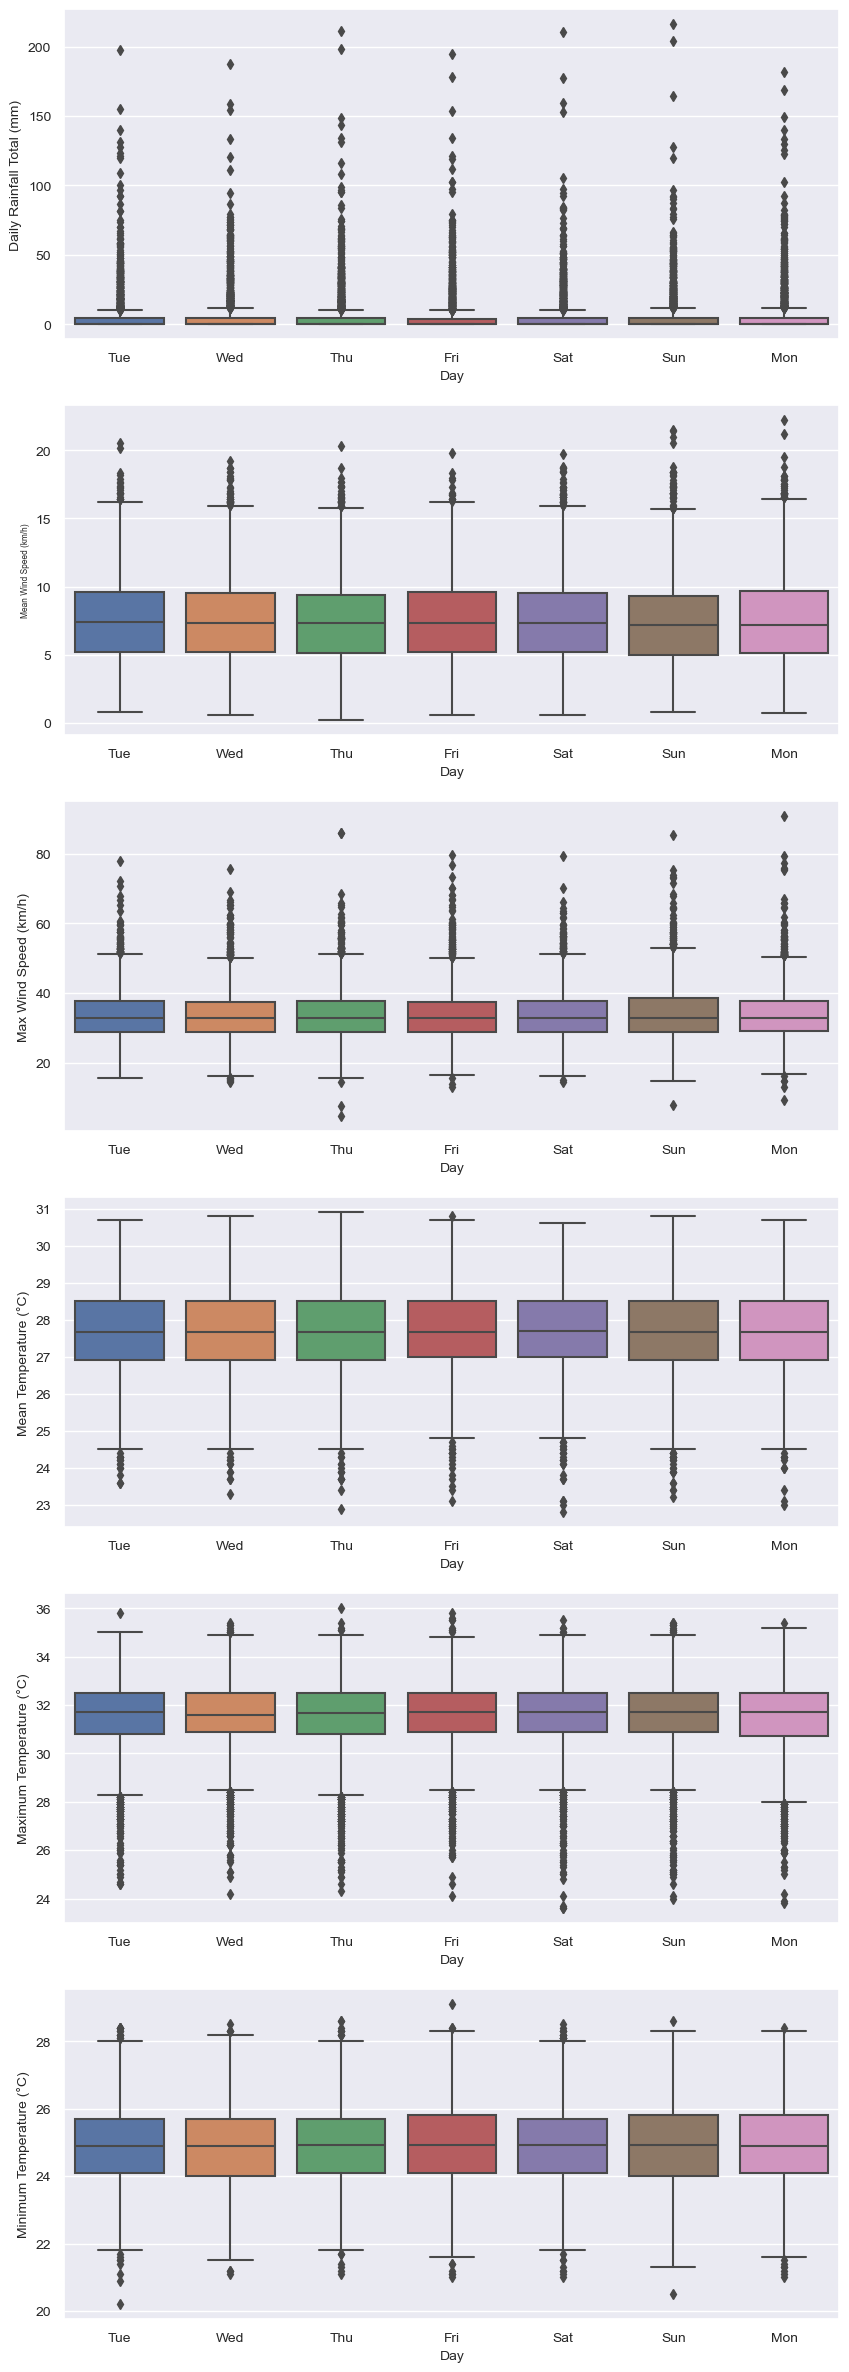

In [45]:
# weekly boxplots 

# establish figure size
plt.figure(figsize=(10, 30))

# subplot #1
# plt.subplot(6, 1, 1) means we have 6 rows, 1 column, and are referencing plot 1.
ax1 = plt.subplot(6, 1, 1) 
ax1.set_xlabel('Group', fontsize=10)
ax1.set_ylabel('Value', fontsize=10)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
sns.boxplot(x = climate_daily.Day, 
            y = climate_daily['Daily Rainfall Total (mm)'], 
            ax = ax1)

# subplot #2
# plt.subplot(6, 1, 2) means we have 6 rows, 1 column, and are referencing plot 2.
ax2 = plt.subplot(6, 1, 2)
ax2.set_xlabel('Group', fontsize=10)
ax3.set_ylabel('Value', fontsize=10)
ax2.tick_params(axis='x', labelsize=10)
ax2.tick_params(axis='y', labelsize=10)
sns.boxplot(x = climate_daily.Day, 
            y = climate_daily['Mean Wind Speed (km/h)'],
            ax = ax2)

# subplot #3
# plt.subplot(6, 1, 3) means we have 6 rows, 1 column, and are referencing plot 3.
ax3 = plt.subplot(6, 1, 3) 
ax3.set_xlabel('Group', fontsize=10)
ax3.set_ylabel('Value', fontsize=10)
ax3.tick_params(axis='x', labelsize=10)
ax3.tick_params(axis='y', labelsize=10)
sns.boxplot(x = climate_daily.Day, 
            y = climate_daily['Max Wind Speed (km/h)'], 
            ax = ax3)

# subplot #4
# plt.subplot(6, 1, 4) means we have 6 rows, 1 column, and are referencing plot 4. 
ax4 = plt.subplot(6, 1, 4) 
ax4.set_xlabel('Group', fontsize=10)
ax4.set_ylabel('Value', fontsize=10)
ax4.tick_params(axis='x', labelsize=10)
ax4.tick_params(axis='y', labelsize=10)
sns.boxplot(x = climate_daily.Day, 
            y = climate_daily['Mean Temperature (°C)'], 
            ax = ax4)

# subplot #5 
# plt.subplot(6, 1, 5) means we have 6 rows, 1 column, and are referencing plot 5. 
ax5 = plt.subplot(6, 1, 5) 
ax5.set_xlabel('Group', fontsize=10)
ax5.set_ylabel('Value', fontsize=10)
ax5.tick_params(axis='x', labelsize=10)
ax5.tick_params(axis='y', labelsize=10)
sns.boxplot(x = climate_daily.Day, 
            y = climate_daily['Maximum Temperature (°C)'], 
            ax = ax5)

# subplot #6
# plt.subplot(6, 1, 6) means we have 6 rows, 1 column, and are referencing plot 6. 
ax6 = plt.subplot(6, 1, 6) 
ax6.set_xlabel('Group', fontsize=10)
ax6.set_ylabel('Value', fontsize=10)
ax6.tick_params(axis='x', labelsize=10)
ax6.tick_params(axis='y', labelsize=10)
sns.boxplot(x = climate_daily.Day, 
            y = climate_daily['Minimum Temperature (°C)'], 
            ax = ax6);


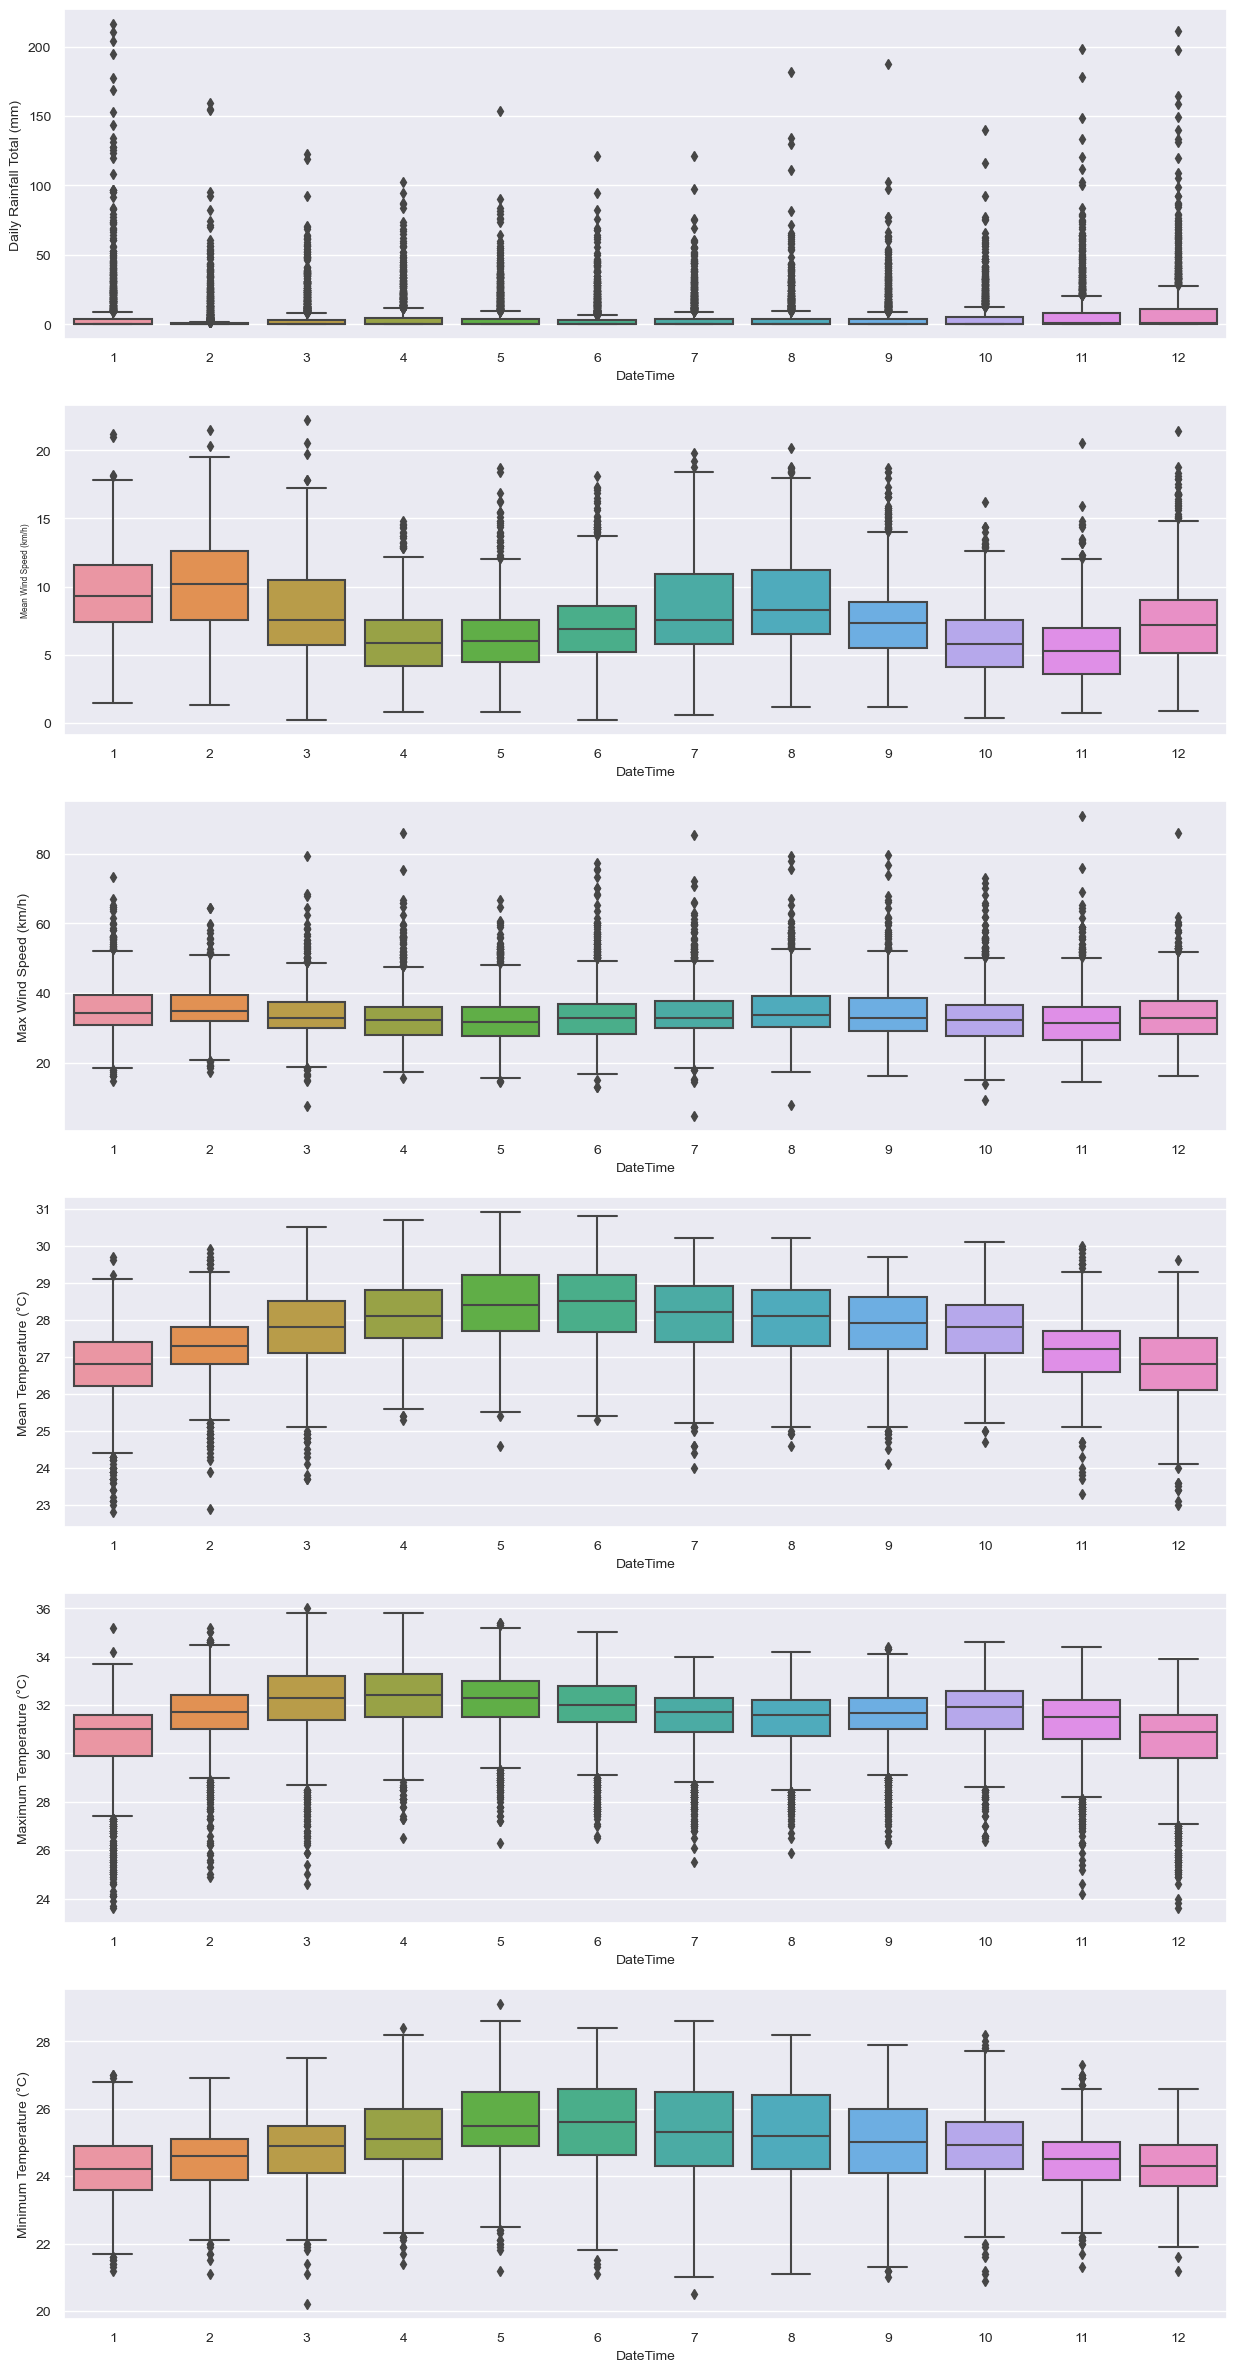

In [40]:
# monthly boxplots 

# establish figure size
plt.figure(figsize=(15, 30))

# subplot #1
# plt.subplot(6, 1, 1) means we have 6 rows, 1 column, and are referencing plot 1.
ax1 = plt.subplot(6, 1, 1) 
ax1.set_xlabel('Group', fontsize=10)
ax1.set_ylabel('Value', fontsize=10)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
sns.boxplot(x = climate_daily.index.month, 
            y = climate_daily['Daily Rainfall Total (mm)'], 
            ax = ax1)

# subplot #2
# plt.subplot(6, 1, 2) means we have 6 rows, 1 column, and are referencing plot 2.
ax2 = plt.subplot(6, 1, 2)
ax2.set_xlabel('Group', fontsize=10)
ax3.set_ylabel('Value', fontsize=10)
ax2.tick_params(axis='x', labelsize=10)
ax2.tick_params(axis='y', labelsize=10)
sns.boxplot(x = climate_daily.index.month, 
            y = climate_daily['Mean Wind Speed (km/h)'],
            ax = ax2)

# subplot #3
# plt.subplot(6, 1, 3) means we have 6 rows, 1 column, and are referencing plot 3.
ax3 = plt.subplot(6, 1, 3) 
ax3.set_xlabel('Group', fontsize=10)
ax3.set_ylabel('Value', fontsize=10)
ax3.tick_params(axis='x', labelsize=10)
ax3.tick_params(axis='y', labelsize=10)
sns.boxplot(x = climate_daily.index.month, 
            y = climate_daily['Max Wind Speed (km/h)'], 
            ax = ax3)

# subplot #4
# plt.subplot(6, 1, 4) means we have 6 rows, 1 column, and are referencing plot 4. 
ax4 = plt.subplot(6, 1, 4) 
ax4.set_xlabel('Group', fontsize=10)
ax4.set_ylabel('Value', fontsize=10)
ax4.tick_params(axis='x', labelsize=10)
ax4.tick_params(axis='y', labelsize=10)
sns.boxplot(x = climate_daily.index.month, 
            y = climate_daily['Mean Temperature (°C)'], 
            ax = ax4)

# subplot #5 
# plt.subplot(6, 1, 5) means we have 6 rows, 1 column, and are referencing plot 5. 
ax5 = plt.subplot(6, 1, 5) 
ax5.set_xlabel('Group', fontsize=10)
ax5.set_ylabel('Value', fontsize=10)
ax5.tick_params(axis='x', labelsize=10)
ax5.tick_params(axis='y', labelsize=10)
sns.boxplot(x = climate_daily.index.month, 
            y = climate_daily['Maximum Temperature (°C)'], 
            ax = ax5)

# subplot #6
# plt.subplot(6, 1, 6) means we have 6 rows, 1 column, and are referencing plot 6. 
ax6 = plt.subplot(6, 1, 6) 
ax6.set_xlabel('Group', fontsize=10)
ax6.set_ylabel('Value', fontsize=10)
ax6.tick_params(axis='x', labelsize=10)
ax6.tick_params(axis='y', labelsize=10)
sns.boxplot(x = climate_daily.index.month, 
            y = climate_daily['Minimum Temperature (°C)'], 
            ax = ax6);


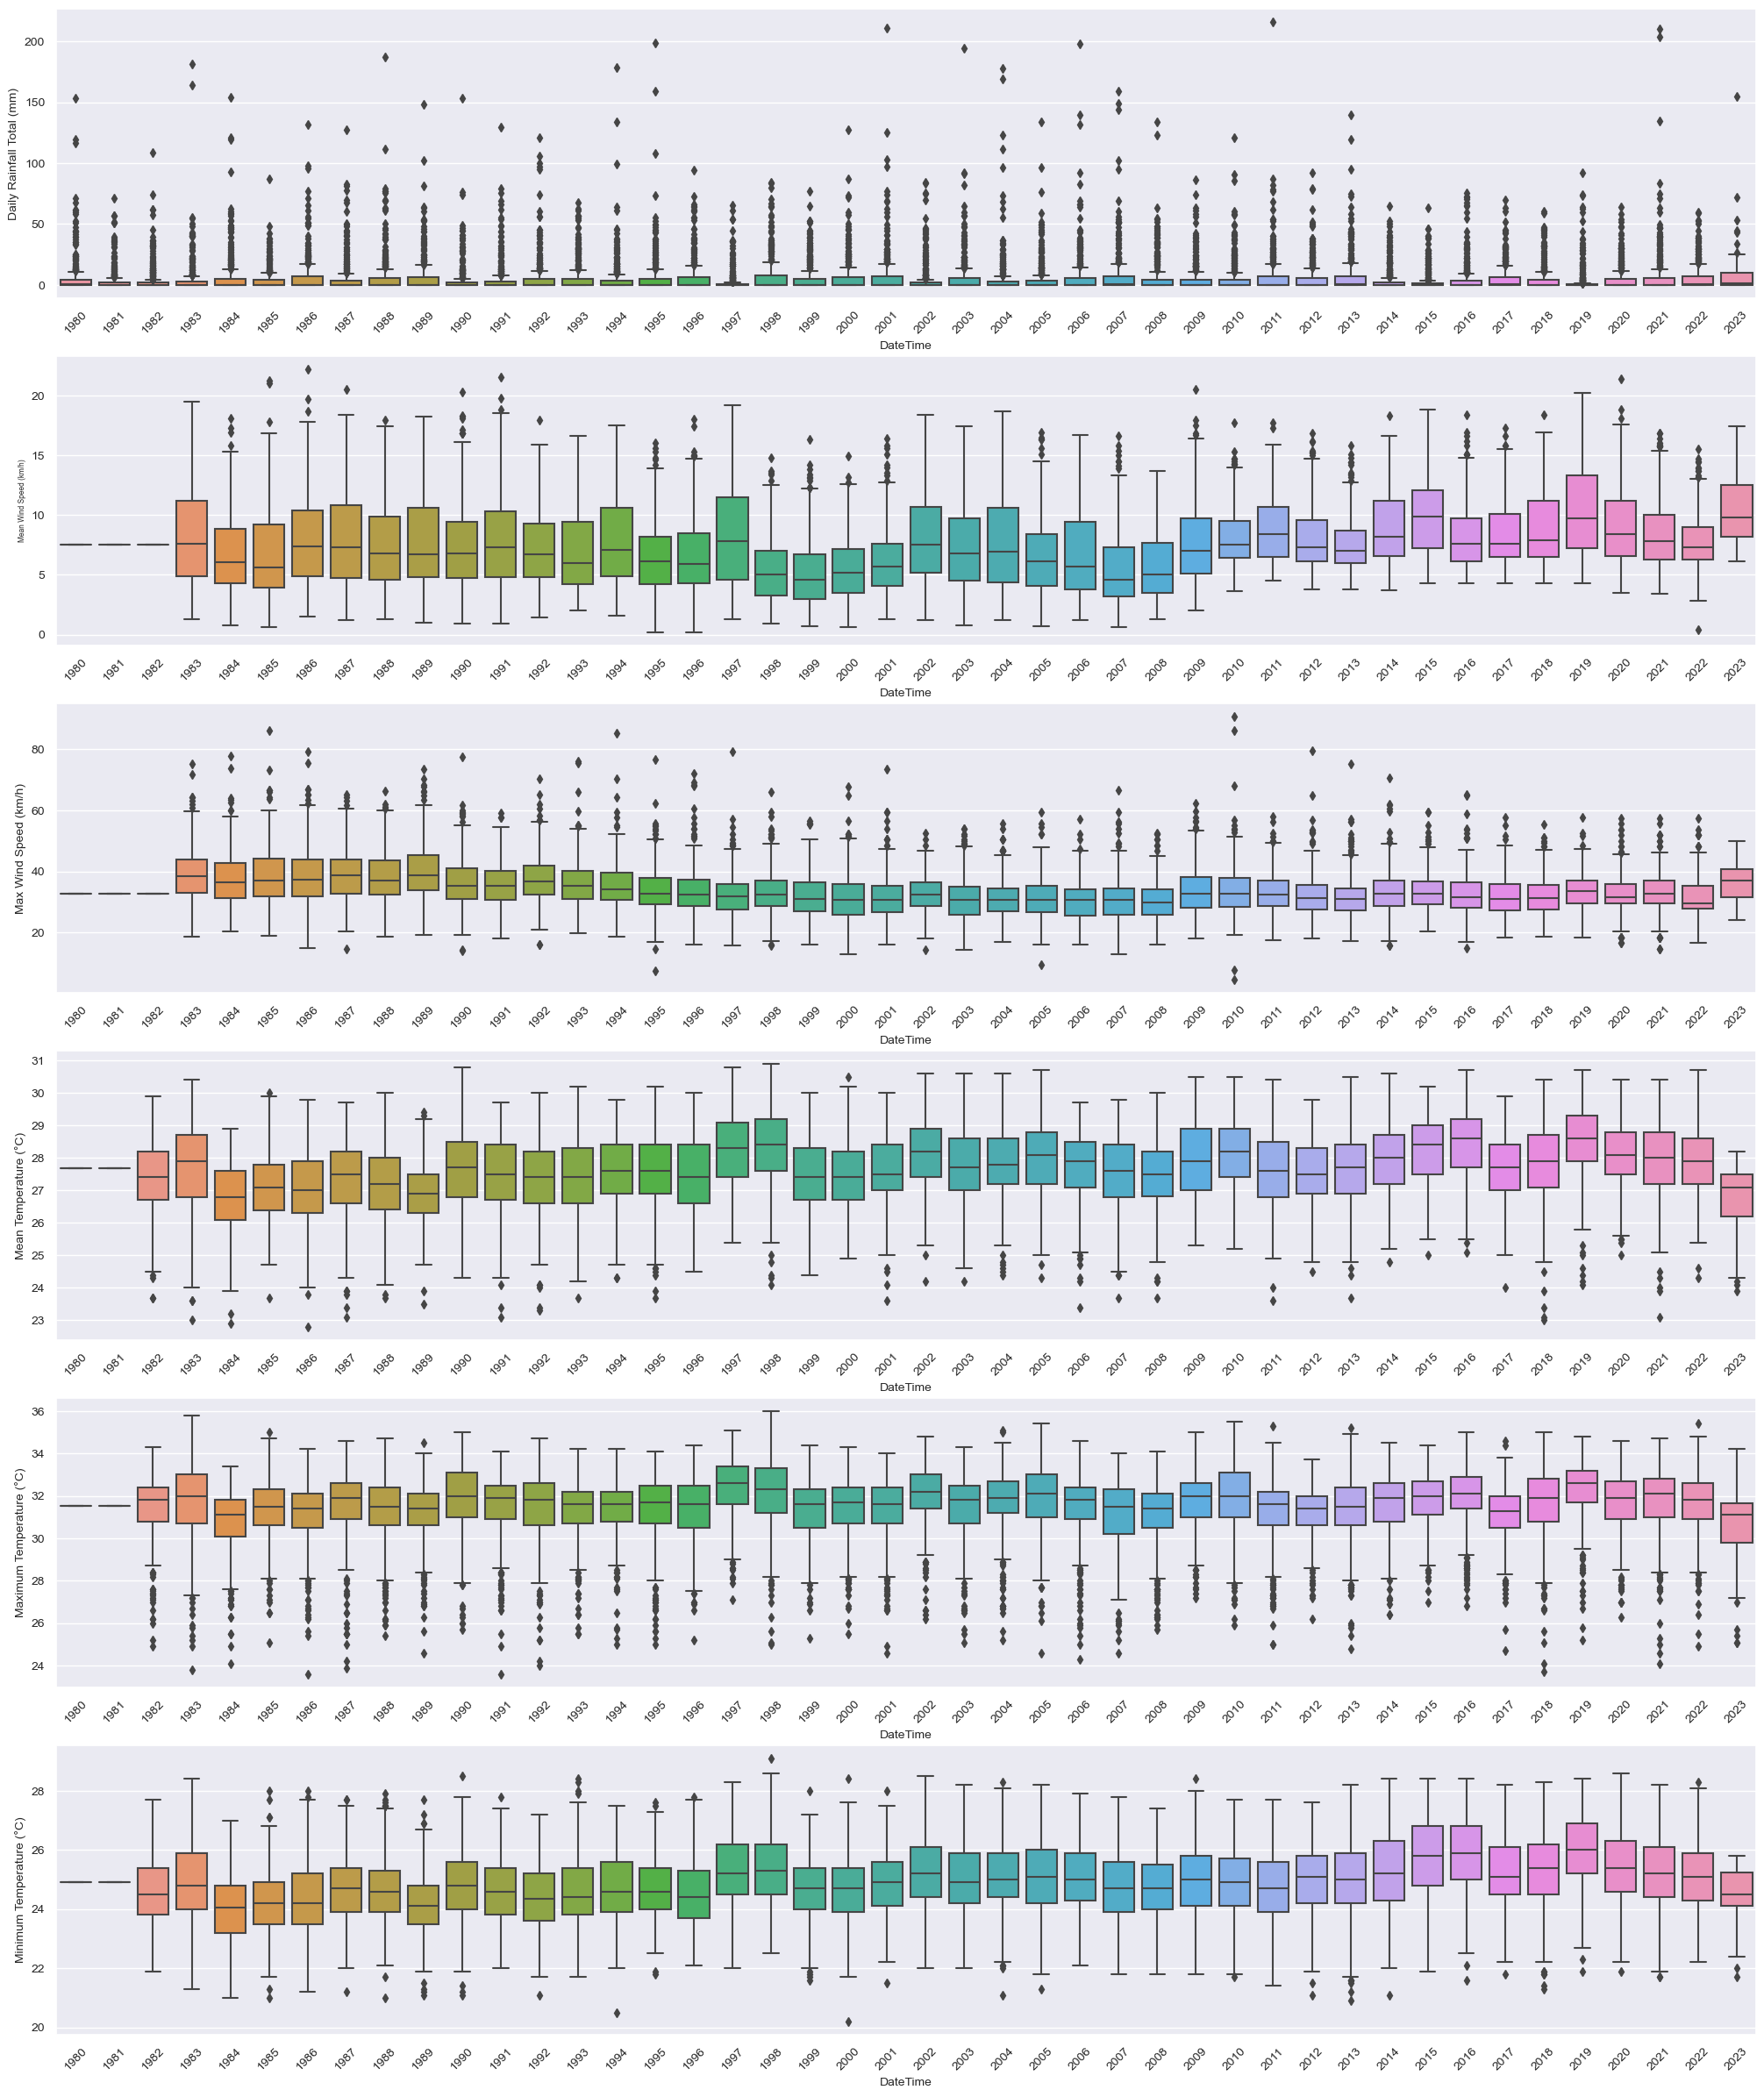

In [44]:
# yearly boxplots 

# establish figure size
plt.figure(figsize=(25, 30))

# subplot #1
# plt.subplot(6, 1, 1) means we have 6 rows, 1 column, and are referencing plot 1.
ax1 = plt.subplot(6, 1, 1) 
ax1.set_xlabel('Group', fontsize=10)
ax1.set_ylabel('Value', fontsize=10)
ax1.tick_params(axis='x', labelsize=10, rotation=45)
ax1.tick_params(axis='y', labelsize=10)
sns.boxplot(x = climate_daily.index.year, 
            y = climate_daily['Daily Rainfall Total (mm)'], 
            ax = ax1)

# subplot #2
# plt.subplot(6, 1, 2) means we have 6 rows, 1 column, and are referencing plot 2.
ax2 = plt.subplot(6, 1, 2)
ax2.set_xlabel('Group', fontsize=10)
ax3.set_ylabel('Value', fontsize=10)
ax2.tick_params(axis='x', labelsize=10, rotation=45)
ax2.tick_params(axis='y', labelsize=10)
sns.boxplot(x = climate_daily.index.year, 
            y = climate_daily['Mean Wind Speed (km/h)'],
            ax = ax2)

# subplot #3
# plt.subplot(6, 1, 3) means we have 6 rows, 1 column, and are referencing plot 3.
ax3 = plt.subplot(6, 1, 3) 
ax3.set_xlabel('Group', fontsize=10)
ax3.set_ylabel('Value', fontsize=10)
ax3.tick_params(axis='x', labelsize=10, rotation=45)
ax3.tick_params(axis='y', labelsize=10)
sns.boxplot(x = climate_daily.index.year, 
            y = climate_daily['Max Wind Speed (km/h)'], 
            ax = ax3)

# subplot #4
# plt.subplot(6, 1, 4) means we have 6 rows, 1 column, and are referencing plot 4. 
ax4 = plt.subplot(6, 1, 4) 
ax4.set_xlabel('Group', fontsize=10)
ax4.set_ylabel('Value', fontsize=10)
ax4.tick_params(axis='x', labelsize=10, rotation=45)
ax4.tick_params(axis='y', labelsize=10)
sns.boxplot(x = climate_daily.index.year, 
            y = climate_daily['Mean Temperature (°C)'], 
            ax = ax4)

# subplot #5 
# plt.subplot(6, 1, 5) means we have 6 rows, 1 column, and are referencing plot 5. 
ax5 = plt.subplot(6, 1, 5) 
ax5.set_xlabel('Group', fontsize=10)
ax5.set_ylabel('Value', fontsize=10)
ax5.tick_params(axis='x', labelsize=10, rotation=45)
ax5.tick_params(axis='y', labelsize=10)
sns.boxplot(x = climate_daily.index.year, 
            y = climate_daily['Maximum Temperature (°C)'], 
            ax = ax5)

# subplot #6
# plt.subplot(6, 1, 6) means we have 6 rows, 1 column, and are referencing plot 6. 
ax6 = plt.subplot(6, 1, 6) 
ax6.set_xlabel('Group', fontsize=10)
ax6.set_ylabel('Value', fontsize=10)
ax6.tick_params(axis='x', labelsize=10, rotation=45)
ax6.tick_params(axis='y', labelsize=10)
sns.boxplot(x = climate_daily.index.year, 
            y = climate_daily['Minimum Temperature (°C)'], 
            ax = ax6);


---
### Calendar Heatmaps

/var/folders/1k/lmhy97td4h17yfgn7vlzp0ph0000gp/T/ipykernel_6022/1655783168.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(6, 1, 1)


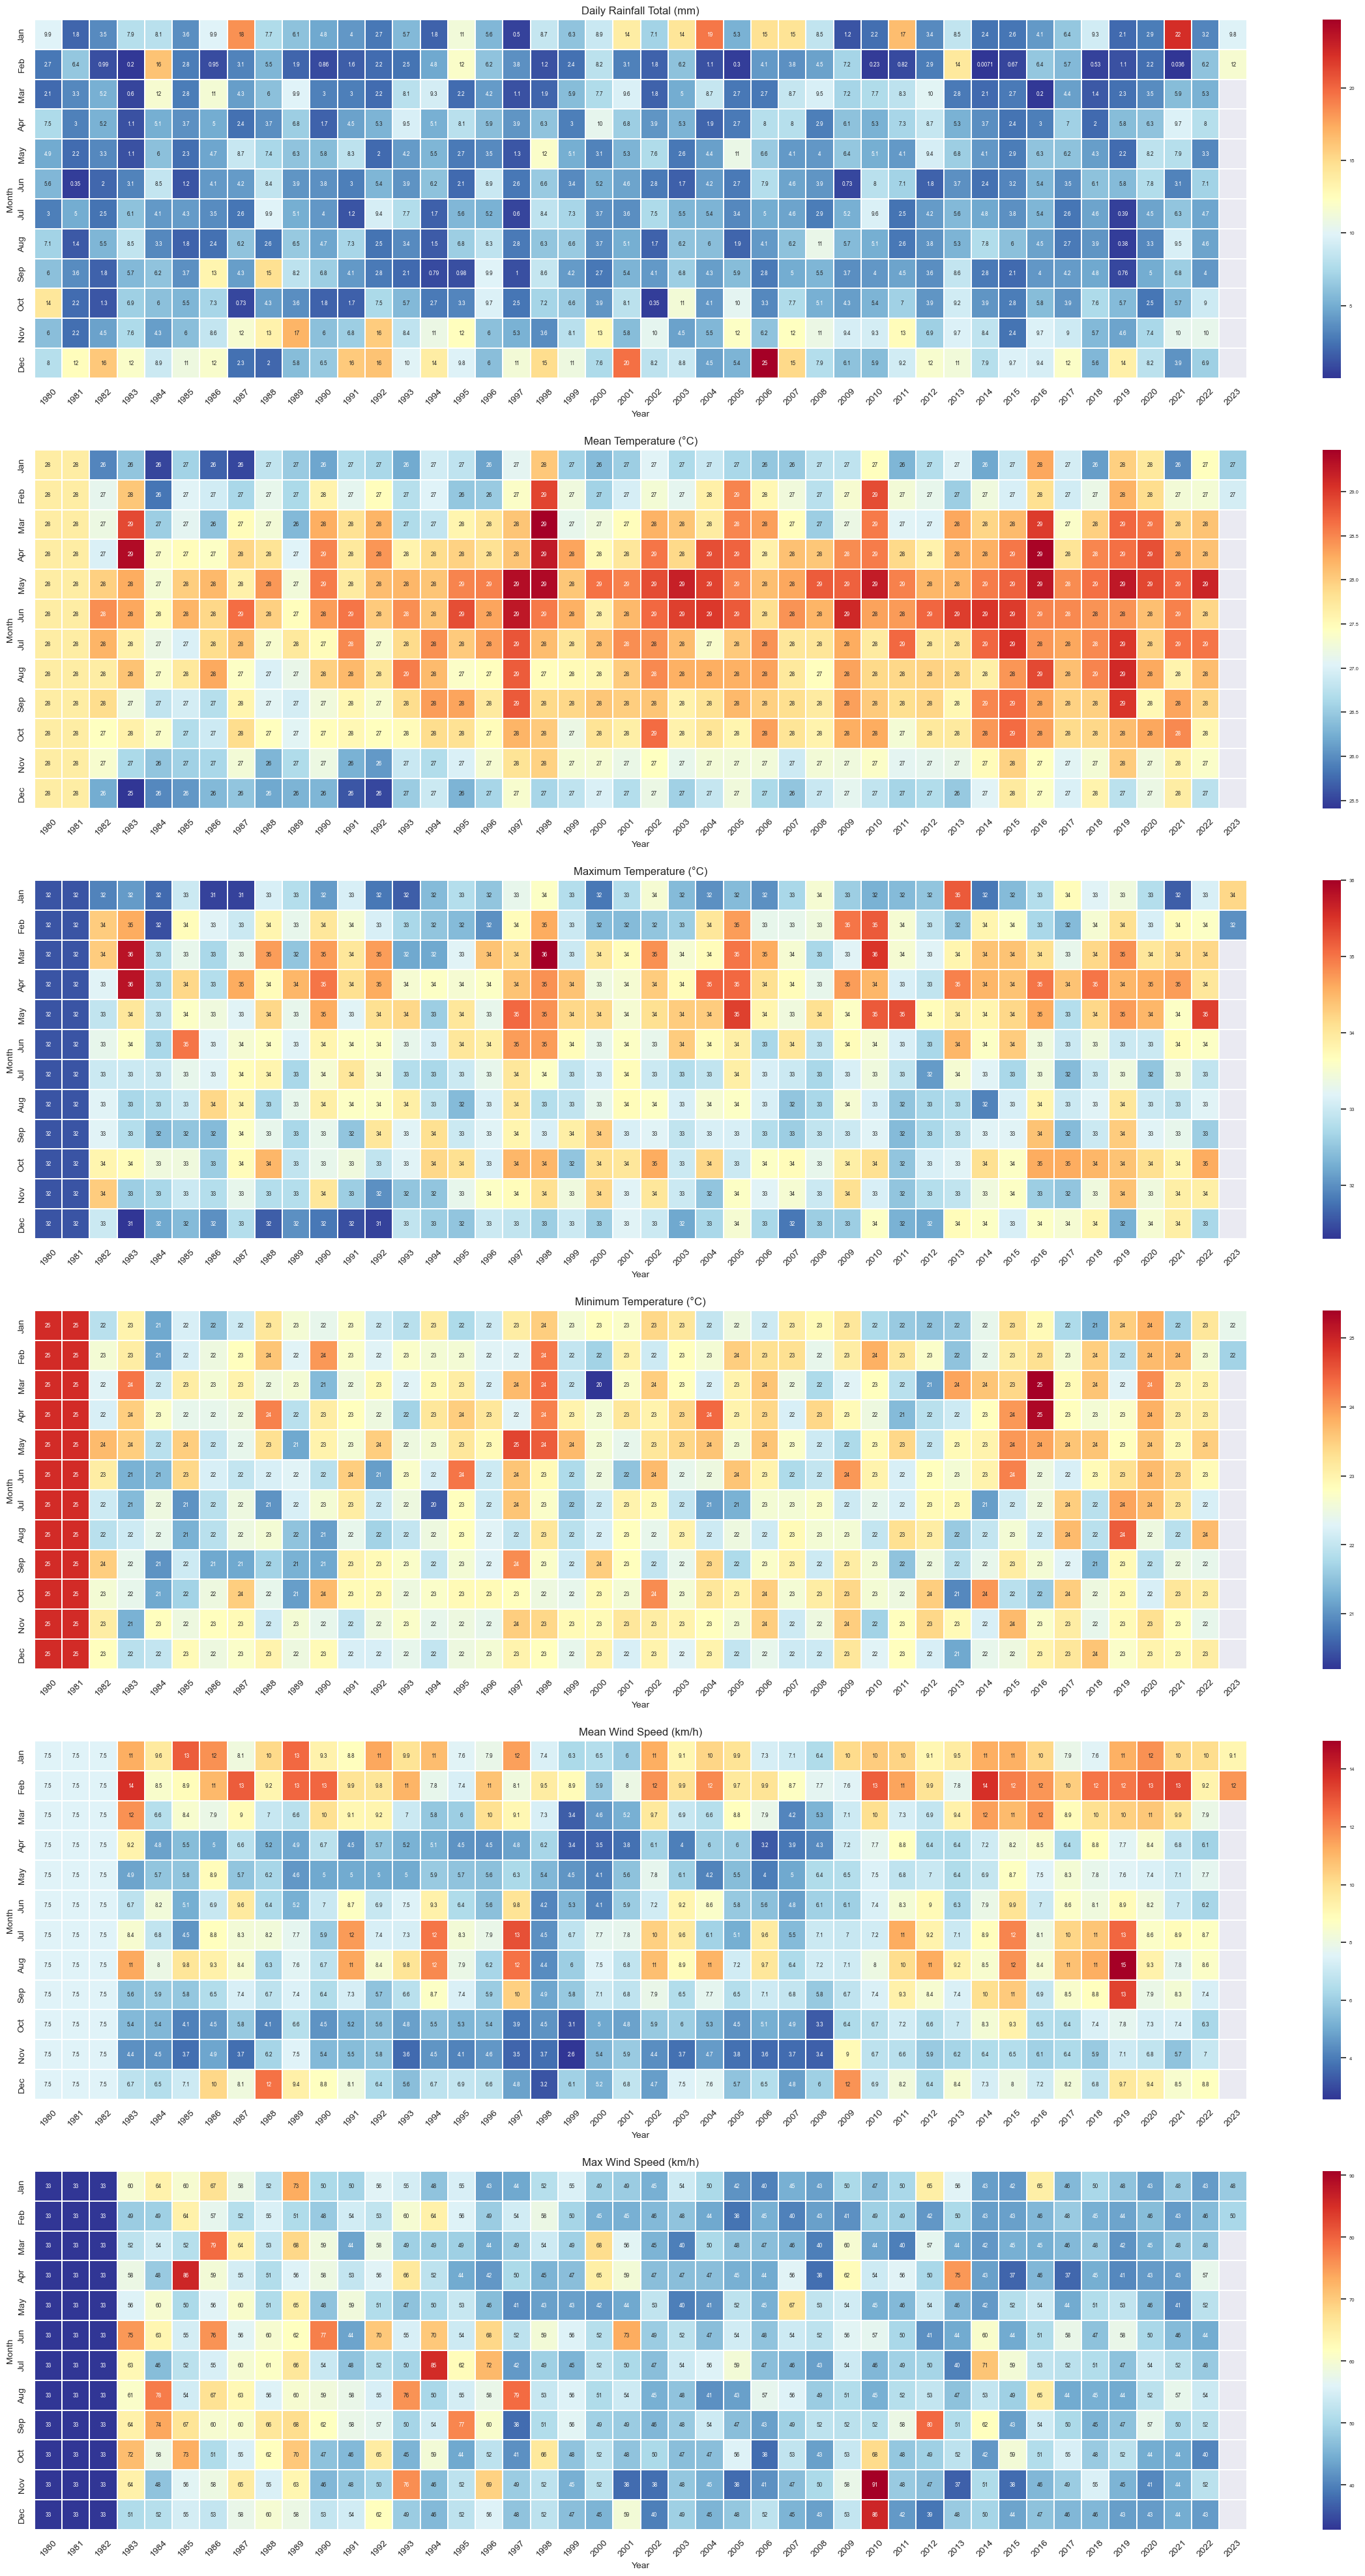

In [53]:
# establish figure size
plt.subplots(figsize=(30, 50))
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# subplot #1
# plt.subplot(6, 1, 1) means we have 6 rows, 1 column, and are referencing plot 1.
ax1 = plt.subplot(6, 1, 1) 
ax1.set_title('Daily Rainfall Total (mm)', fontsize=12)
ax1.set_xlabel('Group', fontsize=10)
ax1.set_ylabel('Value', fontsize=10)
ax1.tick_params(axis='x', labelsize=10, rotation=45)
ax1.tick_params(axis='y', labelsize=10)
pt = climate_daily.pivot_table(index='Month', columns='Year', values='Daily Rainfall Total (mm)', aggfunc='mean')
daily_rainfall_total = pt.reindex(months)
sns.heatmap(daily_rainfall_total, linewidths = 0.3, annot=True, cmap='RdYlBu_r', ax=ax1)
sns.set(font_scale=0.5)

# subplot #2
# plt.subplot(6, 1, 2) means we have 6 rows, 1 column, and are referencing plot 2.
ax2 = plt.subplot(6, 1, 2) 
ax2.set_title('Mean Temperature (°C)', fontsize=12)
ax2.set_xlabel('Group', fontsize=10)
ax2.set_ylabel('Value', fontsize=10)
ax2.tick_params(axis='x', labelsize=10, rotation=45)
ax2.tick_params(axis='y', labelsize=10)
pt = climate_daily.pivot_table(index='Month', columns='Year', values='Mean Temperature (°C)', aggfunc='mean')
mean_temperature = pt.reindex(months)
sns.heatmap(mean_temperature, linewidths = 0.3, annot=True, cmap='RdYlBu_r', ax=ax2)
sns.set(font_scale=0.5)

# subplot #3
# plt.subplot(6, 1, 3) means we have 6 rows, 1 column, and are referencing plot 3.
ax3 = plt.subplot(6, 1, 3) 
ax3.set_title('Maximum Temperature (°C)', fontsize=12)
ax3.set_xlabel('Group', fontsize=10)
ax3.set_ylabel('Value', fontsize=10)
ax3.tick_params(axis='x', labelsize=10, rotation=45)
ax3.tick_params(axis='y', labelsize=10)
pt = climate_daily.pivot_table(index='Month', columns='Year', values='Maximum Temperature (°C)', aggfunc='max')
maximum_temperature = pt.reindex(months)
sns.heatmap(maximum_temperature, linewidths = 0.3, annot=True, cmap='RdYlBu_r', ax=ax3)
sns.set(font_scale=0.5)

# subplot #4
# plt.subplot(6, 1, 4) means we have 6 rows, 1 column, and are referencing plot 4.
ax4 = plt.subplot(6, 1, 4) 
ax4.set_title('Minimum Temperature (°C)', fontsize=12)
ax4.set_xlabel('Group', fontsize=10)
ax4.set_ylabel('Value', fontsize=10)
ax4.tick_params(axis='x', labelsize=10, rotation=45)
ax4.tick_params(axis='y', labelsize=10)
pt = climate_daily.pivot_table(index='Month', columns='Year', values='Minimum Temperature (°C)', aggfunc='min')
minimum_temperature = pt.reindex(months)
sns.heatmap(minimum_temperature, linewidths = 0.3, annot=True, cmap='RdYlBu_r', ax=ax4)
sns.set(font_scale=0.5)

# subplot #5
# plt.subplot(6, 1, 5) means we have 6 rows, 1 column, and are referencing plot 5.
ax5 = plt.subplot(6, 1, 5) 
ax5.set_title('Mean Wind Speed (km/h)', fontsize=12)
ax5.set_xlabel('Group', fontsize=10)
ax5.set_ylabel('Value', fontsize=10)
ax5.tick_params(axis='x', labelsize=10, rotation=45)
ax5.tick_params(axis='y', labelsize=10)
pt = climate_daily.pivot_table(index='Month', columns='Year', values='Mean Wind Speed (km/h)', aggfunc='mean')
mean_wind_speed = pt.reindex(months)
sns.heatmap(mean_wind_speed, linewidths = 0.3, annot=True, cmap='RdYlBu_r', ax=ax5)
sns.set(font_scale=0.5)

# subplot #6
# plt.subplot(6, 1, 6) means we have 6 rows, 1 column, and are referencing plot 6.
ax6 = plt.subplot(6, 1, 6) 
ax6.set_title('Max Wind Speed (km/h)', fontsize=12)
ax6.set_xlabel('Group', fontsize=10)
ax6.set_ylabel('Value', fontsize=10)
ax6.tick_params(axis='x', labelsize=10, rotation=45)
ax6.tick_params(axis='y', labelsize=10)
pt = climate_daily.pivot_table(index='Month', columns='Year', values='Max Wind Speed (km/h)', aggfunc='max')
max_wind_speed = pt.reindex(months)
sns.heatmap(max_wind_speed, linewidths = 0.3, annot=True, cmap='RdYlBu_r', ax=ax6)
sns.set(font_scale=0.5)

/var/folders/1k/lmhy97td4h17yfgn7vlzp0ph0000gp/T/ipykernel_6022/2312356199.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(6, 1, 1)


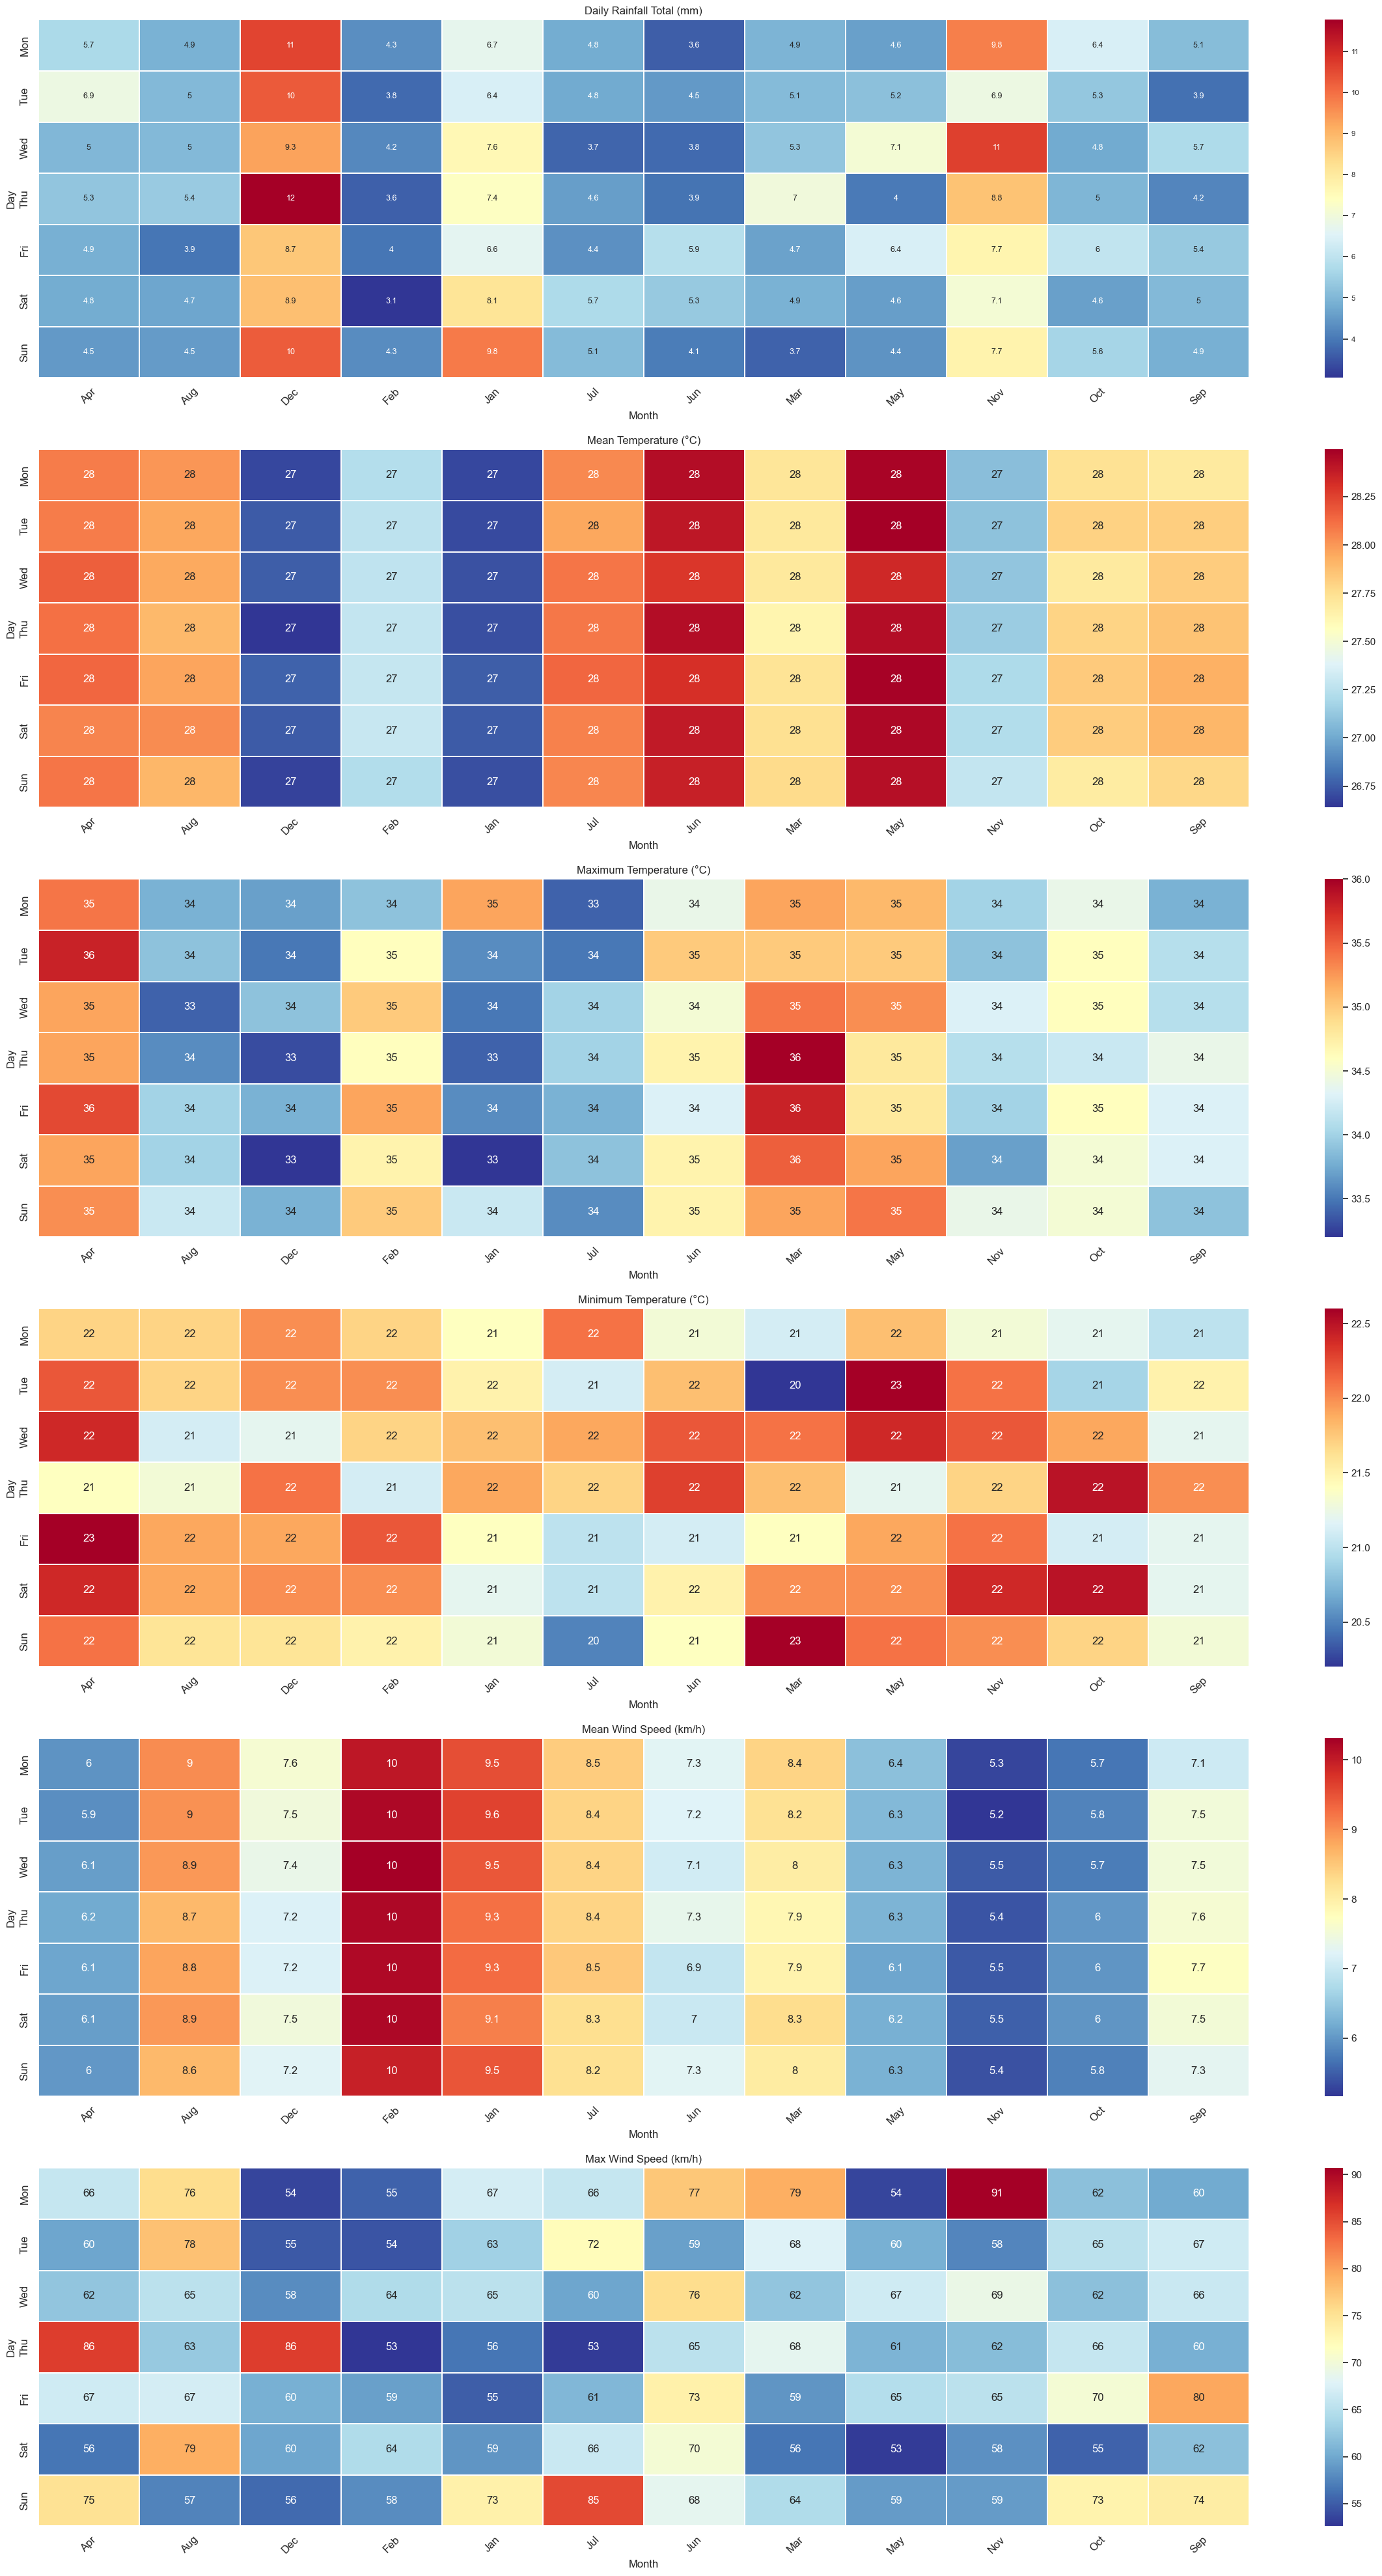

In [58]:
# establish figure size
plt.subplots(figsize=(30, 50))
days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

# subplot #1
# plt.subplot(6, 1, 1) means we have 6 rows, 1 column, and are referencing plot 1.
ax1 = plt.subplot(6, 1, 1) 
ax1.set_title('Daily Rainfall Total (mm)', fontsize=12)
ax1.set_xlabel('Group', fontsize=12)
ax1.set_ylabel('Value', fontsize=12)
ax1.tick_params(axis='x', labelsize=12, rotation=45)
ax1.tick_params(axis='y', labelsize=12)
pt = climate_daily.pivot_table(index='Day', columns='Month', values='Daily Rainfall Total (mm)', aggfunc='mean')
daily_rainfall_total = pt.reindex(days)
sns.heatmap(daily_rainfall_total, linewidths = 0.3, annot=True, cmap='RdYlBu_r', ax=ax1)
sns.set(font_scale=1)

# subplot #2
# plt.subplot(6, 1, 2) means we have 6 rows, 1 column, and are referencing plot 2.
ax2 = plt.subplot(6, 1, 2) 
ax2.set_title('Mean Temperature (°C)', fontsize=12)
ax2.set_xlabel('Group', fontsize=12)
ax2.set_ylabel('Value', fontsize=12)
ax2.tick_params(axis='x', labelsize=12, rotation=45)
ax2.tick_params(axis='y', labelsize=12)
pt = climate_daily.pivot_table(index='Day', columns='Month', values='Mean Temperature (°C)', aggfunc='mean')
mean_temperature = pt.reindex(days)
sns.heatmap(mean_temperature, linewidths = 0.3, annot=True, cmap='RdYlBu_r', ax=ax2)
sns.set(font_scale=1)

# subplot #3
# plt.subplot(6, 1, 3) means we have 6 rows, 1 column, and are referencing plot 3.
ax3 = plt.subplot(6, 1, 3) 
ax3.set_title('Maximum Temperature (°C)', fontsize=12)
ax3.set_xlabel('Group', fontsize=12)
ax3.set_ylabel('Value', fontsize=12)
ax3.tick_params(axis='x', labelsize=12, rotation=45)
ax3.tick_params(axis='y', labelsize=12)
pt = climate_daily.pivot_table(index='Day', columns='Month', values='Maximum Temperature (°C)', aggfunc='max')
maximum_temperature = pt.reindex(days)
sns.heatmap(maximum_temperature, linewidths = 0.3, annot=True, cmap='RdYlBu_r', ax=ax3)
sns.set(font_scale=1)

# subplot #4
# plt.subplot(6, 1, 4) means we have 6 rows, 1 column, and are referencing plot 4.
ax4 = plt.subplot(6, 1, 4) 
ax4.set_title('Minimum Temperature (°C)', fontsize=12)
ax4.set_xlabel('Group', fontsize=12)
ax4.set_ylabel('Value', fontsize=12)
ax4.tick_params(axis='x', labelsize=12, rotation=45)
ax4.tick_params(axis='y', labelsize=12)
pt = climate_daily.pivot_table(index='Day', columns='Month', values='Minimum Temperature (°C)', aggfunc='min')
minimum_temperature = pt.reindex(days)
sns.heatmap(minimum_temperature, linewidths = 0.3, annot=True, cmap='RdYlBu_r', ax=ax4)
sns.set(font_scale=1)

# subplot #5
# plt.subplot(6, 1, 5) means we have 6 rows, 1 column, and are referencing plot 5.
ax5 = plt.subplot(6, 1, 5) 
ax5.set_title('Mean Wind Speed (km/h)', fontsize=12)
ax5.set_xlabel('Group', fontsize=12)
ax5.set_ylabel('Value', fontsize=12)
ax5.tick_params(axis='x', labelsize=12, rotation=45)
ax5.tick_params(axis='y', labelsize=12)
pt = climate_daily.pivot_table(index='Day', columns='Month', values='Mean Wind Speed (km/h)', aggfunc='mean')
mean_wind_speed = pt.reindex(days)
sns.heatmap(mean_wind_speed, linewidths = 0.3, annot=True, cmap='RdYlBu_r', ax=ax5)
sns.set(font_scale=1)

# subplot #6
# plt.subplot(6, 1, 6) means we have 6 rows, 1 column, and are referencing plot 6.
ax6 = plt.subplot(6, 1, 6) 
ax6.set_title('Max Wind Speed (km/h)', fontsize=12)
ax6.set_xlabel('Group', fontsize=12)
ax6.set_ylabel('Value', fontsize=12)
ax6.tick_params(axis='x', labelsize=12, rotation=45)
ax6.tick_params(axis='y', labelsize=12)
pt = climate_daily.pivot_table(index='Day', columns='Month', values='Max Wind Speed (km/h)', aggfunc='max')
max_wind_speed = pt.reindex(days)
sns.heatmap(max_wind_speed, linewidths = 0.3, annot=True, cmap='RdYlBu_r', ax=ax6)
sns.set(font_scale=1)

---
### Time Series Lag ScatterPlots

---
### Visualise Distributions using Histograms